# analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.11.10

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only



# Load basic functions

In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

22188


# 0. fov parameters

In [5]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only',
             'save_folder':r'E:\Analyzed_data\20211108-P_brain_CTP11-1000_DNA_only_warpped',
             'experiment_type': 'DNA',
             'num_threads': 12,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 800,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             'ref_id': 1, # special for this experiment
             }


In [6]:
_fov_id = 7
# create fov class
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          _save_info_to_file=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 53
- Number of field of views: 60
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C50', 'H26C26', 'H27C27', 'H28C28', 'H29C29', 'H30C30', 'H31C31', 'H32C32', 'H33C33', 'H34C34', 'H35C35', 'H36C36', 'H37C37', 'H38C38', 'H39C39', 'H40C40', 'H41C41', 'H42C42', 'H43C43', 'H44C44', 'H45C45', 'H46C46', 'H47C47', 'H48C48', 'H49C49', 'H50P1', 'H51C38_c74', 'H52C38_c75'])
- 53 folders are found according to color-usage annotation.
+ loading fov_info from file: E:\Analyzed_data\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_07.hdf5
++ base attribu

In [ ]:
_overwrite = False
_warp = True
# 2. Process image into candidate spots
fov.parallel = True
fov.combo_ref_id = 1

fov._process_image_to_spots('combo', 
                            #_sel_ids = [74, 75],
                            _load_common_reference=True, _load_with_multiple=False,
                            _save_images=True,
                            _warp_images=_warp, 
                            _fit_spots=True,
                            #_fit_in_mask=True, _fitting_args={'seed_mask':dialated_mask},
                            _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                            _overwrite_spot=_overwrite,
                            _verbose=True)

In [7]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]


In [9]:
reload(ia.classes.preprocess)
sel_crop = ia.classes.preprocess.ImageCrop_3d([[0,60],[920,1090],[1280,1420]])

cropped_ims = [_im[sel_crop.to_slices()] for _im in combo_ims]

<IPython.core.display.Javascript object>


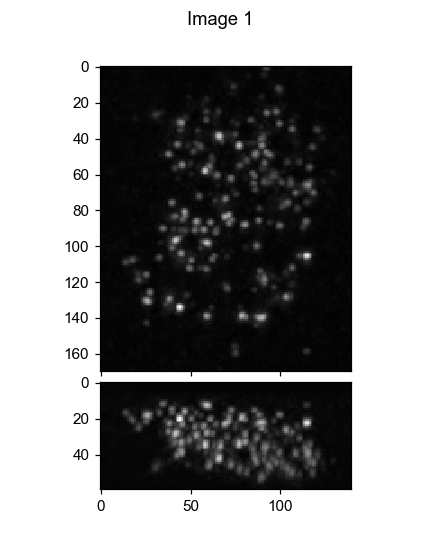

In [10]:
visual_tools.imshow_mark_3d_v2(cropped_ims)

In [612]:
figure_folder = os.path.join(fov.save_folder, 'Figures')
if not os.path.exists(figure_folder):
    os.makedirs(figure_folder)
    print(f"create figure folder: {figure_folder}")
else:
    print(f"choose figure folder: {figure_folder}")

choose figure folder: D:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Figures


<IPython.core.display.Javascript object>


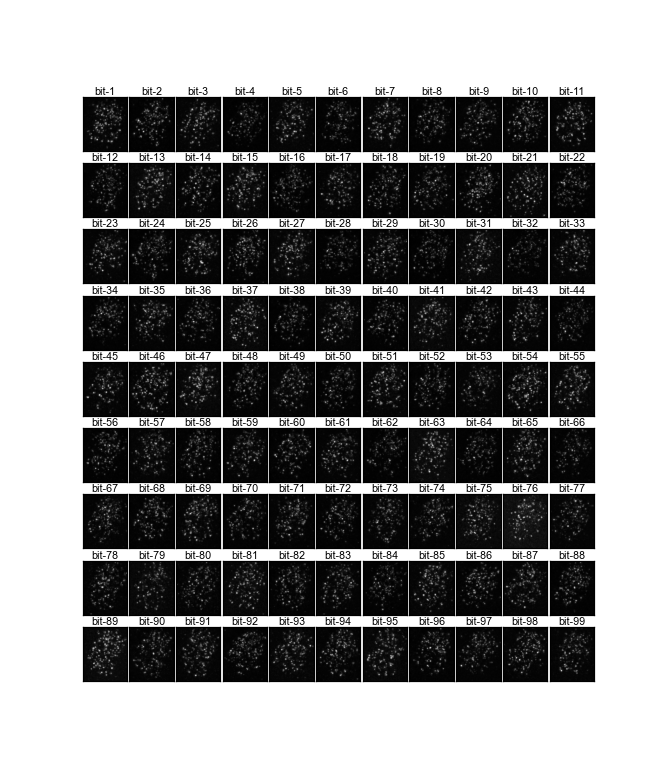

In [671]:
fig, axes = plt.subplots(9,11, figsize=(6,7), gridspec_kw={'wspace':0.05,
                                                            'hspace':0.05,})

for _irow, _row_axes in enumerate(axes):
    for _icol, _ax in enumerate(_row_axes):
        _im = cropped_ims[_irow*len(_row_axes)+_icol]
        _ax.imshow(np.max(_im, axis=0), cmap='Greys_r')
        _ax.axes.xaxis.set_visible(False)
        _ax.axes.yaxis.set_visible(False)
        _ax.set_title(f"bit-{_irow*len(_row_axes)+_icol+1}", fontsize=7, pad=1)
        
fig.savefig(os.path.join(figure_folder, 'example_max_projection.png'), dpi=200, transparent=True)


NameError: name 'reload' is not defined

In [1]:

visual_tools.imshow_mark_3d_v2([_im[sel_crop.to_slices()] for _im in combo_ims])

NameError: name 'visual_tools' is not defined

In [9]:
single_im_size = fov.shared_parameters['single_im_size']

fov._load_from_file('combo')
# segment nucleus with fitted spots
all_coords = np.concatenate(fov.combo_spots_list)[:,:4]

h = np.histogramdd(all_coords[:,1:], 
               bins=[np.arange(0,single_im_size[0]+1,1),
                     np.arange(0,single_im_size[1]+1,1),
                     np.arange(0,single_im_size[2]+1,1),], 
               weights=all_coords[:,0],
                  )[0]

+ loading combo from file: D:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_07.hdf5
++ finish loading combo in 0.243s. 


<IPython.core.display.Javascript object>


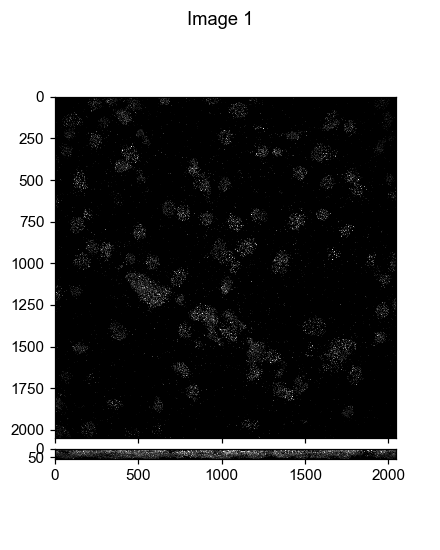

In [10]:
visual_tools.imshow_mark_3d_v2([h])

# load codebook

In [341]:
codebook_df[sel_cols].values

(988, 99)

In [15]:
# load codebook
import pandas as pd
codebook_df = pd.read_csv(r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv')
codebook_df.set_index('name')
codebook = np.array(codebook_df[[_name for _name in codebook_df.columns if 'NDB_' in _name]])
print(codebook.shape)
codebook_df

(988, 99)


,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_824,NDB_712,NDB_818,NDB_940,NDB_872,NDB_934,NDB_926,NDB_910,chr,chr_order
0,1:3740000-3760000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1:6240000-6260000,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1:8740000-8760000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,1:11240000-11260000,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,3
4,1:13740000-13760000,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,X:161240000-161260000,1057,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,X,52
984,X:163740000-163760000,1058,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,X,53
985,X:166240000-166260000,1059,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,X,54
986,X:168740000-168760000,1060,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,X,55


# CPU

In [250]:
reload(ia.classes.preprocess)
from ImageAnalysis3.classes.preprocess import Spots3D, ImageCrop_3d, SpotTuple
reload(ia.spot_tools.scoring)
from ImageAnalysis3.spot_tools.scoring import Normalize_Intensities
from ImageAnalysis3.classes import decode
reload(ia.classes.decode)
from ImageAnalysis3.classes.decode import Merfish_Decoder, DNA_Merfish_Decoder

from scipy.spatial.distance import cdist

In [251]:
fov._load_from_file('combo')
pixel_sizes = np.array(fov.shared_parameters['distance_zxy'])
bits = np.array(fov.combo_ids)+1
spots_list = [Spots3D(_spots, bits=_bit, pixel_sizes=pixel_sizes) for _spots, _bit in zip(fov.combo_spots_list, bits)]
spots_list = [Normalize_Intensities(_spots, _spots) for _spots in spots_list]


+ loading combo from file: D:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_07.hdf5


In [252]:
reload(ia.classes.preprocess)
sel_crop = ia.classes.preprocess.ImageCrop_3d([[0,60],[920,1090],[1280,1420]])

In [253]:
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'

# select candidate spots within this crop
cand_spots_list = []
for _bit, _spots in zip(bits, spots_list):
    _kept_spots = sel_crop.crop_spots(_spots)
    # append
    cand_spots_list.append((_kept_spots))

decoder = DNA_Merfish_Decoder(cand_spots_list, codebook_filename, 
                              pixel_sizes=pixel_sizes)


decoder.find_spot_pairs_in_radius(search_th=150, eps=0.1)

spot_groups = decoder.assemble_complete_codes()



7700 pairs kept given search radius 150 nm.


7700it [00:08, 909.02it/s] 

- 3378 spot groups selected. 


In [254]:
unused_spots = decoder.find_unused_spots(decoder.cand_spots, decoder.spot_groups)

In [259]:
from scipy.spatial import KDTree

invalid_pairs = collect_invalid_pairs(unused_spots)

In [260]:
valid_intensities = [np.mean(_g.spots.to_intensities()) for _g in spot_groups]
invalid_intensities = [np.mean(_g.spots.to_intensities()) for _g in invalid_pairs]

(2.5981782390118733, 0.3205443773481341, 0.5089996771909544) (2.2008759190606613, 0.22658094020372171, 0.4885867101650564)
0.4 2.841763187411168
0.6000000000000001 1.270452270108233
0.8000000000000002 0.8222683698151986
1.0000000000000002 0.5874022789878255
1.2000000000000002 0.4377355954448809
1.4000000000000004 0.33305537510897665
1.6000000000000005 0.2560371879136551
1.8000000000000003 0.19770950341524812
2.0000000000000004 0.1528074696687604
2.2000000000000006 0.11794280719363887
2.400000000000001 0.09077621162783231
2.6000000000000005 0.0696046402477089
2.8000000000000007 0.05313964030082597
3.000000000000001 0.04038063381955293
3.2000000000000006 0.030538046623736326
3.400000000000001 0.022983679893266936
3.600000000000001 0.017216504683781973
3.800000000000001 0.012837549333347522
4.000000000000002 0.009530456093686638
4.200000000000001 0.007045846886025907
4.400000000000002 0.005188473992577073
4.600000000000001 0.00380656686013529
4.800000000000002 0.002783003645328071


<IPython.core.display.Javascript object>


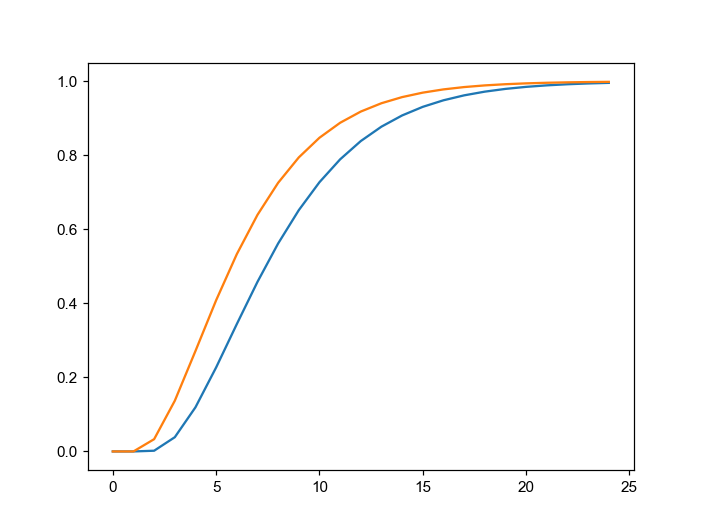

In [261]:
from scipy.stats import gamma, alpha
neg_gamma_params = gamma.fit(invalid_intensities)
neg_pdf = gamma(*neg_gamma_params).cdf(np.arange(0,5,0.2))
pos_gamma_params = gamma.fit(valid_intensities)
pos_pdf = gamma(*pos_gamma_params).cdf(np.arange(0,5,0.2))
print(pos_gamma_params, neg_gamma_params)

dists = np.arange(0.4,5,0.2)
for dist in dists:
    print(dist, np.log(gamma(*neg_gamma_params).cdf(dist)/gamma(*pos_gamma_params).cdf(dist)) )

plt.figure()
plt.plot(pos_pdf)
plt.plot(neg_pdf)
plt.show()

In [262]:
valid_int_stds = [np.var(_g.spots.to_intensities())/np.mean(_g.spots.to_intensities()) for _g in spot_groups]
invalid_int_stds = [np.var(_g.spots.to_intensities())/np.mean(_g.spots.to_intensities()) for _g in invalid_pairs]

<IPython.core.display.Javascript object>


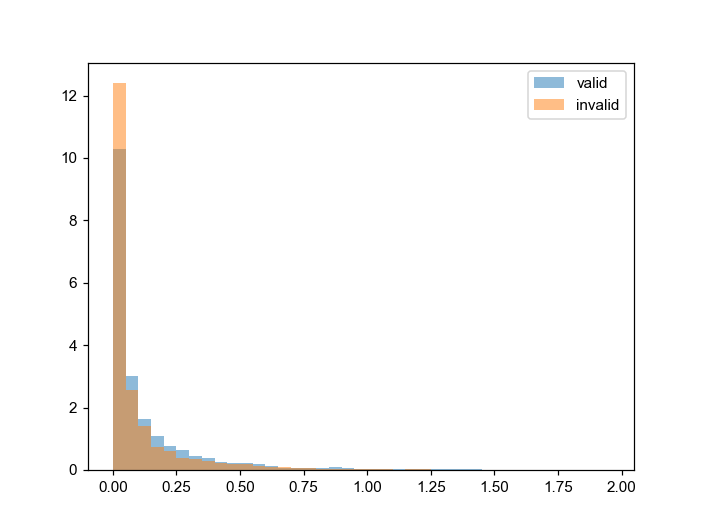

In [263]:
plt.figure()
plt.hist(valid_int_stds, alpha=0.5, bins=np.arange(0,2,0.05), density=True, label='valid')
plt.hist(invalid_int_stds, alpha=0.5, bins=np.arange(0,2,0.05), density=True, label='invalid')
plt.legend()

In [264]:
valid_inter_dists = [np.min(_g.dist_internal()) for _g in spot_groups]
invalid_inter_dists = [np.min(_g.dist_internal()) for _g in invalid_pairs]

(294.153362822948, -535.4919838105463, 2.1389120733625955) (6.587198677837456, -65.52191132839653, 36.47346283655908)
0 0.20148953526963623
50 -0.6193619957603885
100 -0.9544792924146477
150 -0.7457533222140585
200 -0.4251933904173139
250 -0.21676257162697765
300 -0.1050117014820103
350 -0.04853054824628772
400 -0.02141856255171721
450 -0.009054784513045146


<IPython.core.display.Javascript object>


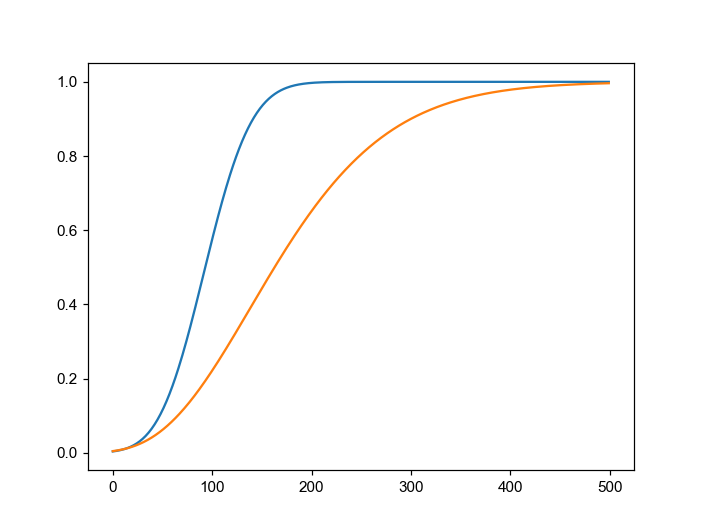

In [265]:
from scipy.stats import gamma, alpha
neg_gamma_params = gamma.fit(invalid_inter_dists)
neg_pdf = gamma(*neg_gamma_params).cdf(np.arange(0,500))
pos_gamma_params = gamma.fit(valid_inter_dists)
pos_pdf = gamma(*pos_gamma_params).cdf(np.arange(0,500))
print(pos_gamma_params, neg_gamma_params)

dists = np.arange(0,500,50)
for dist in dists:
    print(dist, np.log(gamma(*neg_gamma_params).cdf(dist)/gamma(*pos_gamma_params).cdf(dist)) )

plt.figure()
plt.plot(pos_pdf)
plt.plot(neg_pdf)
plt.show()

In [266]:
getattr(np, 'mean')([1,2,3])

2.0

In [267]:
from scipy import stats

In [268]:
def generate_reference(spot_groups,
                       intensity_metric='mean',
                       dist_metric='min',):
    # inteisities
    _ints = [getattr(np, intensity_metric)(_g.spots.to_intensities()) for _g in spot_groups]
    # internal dists
    _inter_dists = [getattr(np, dist_metric)(_g.dist_internal()) for _g in spot_groups]
    return _ints, _inter_dists

In [269]:
def generate_reference_models(ints, inter_dists, 

                              fit_type='gamma'):
    # inteisities
    _int_model = getattr(stats, fit_type)(*getattr(stats, fit_type).fit(ints))
    # internal dists
    _dist_model = getattr(stats, fit_type)(*getattr(stats, fit_type).fit(inter_dists))
    return _int_model, _dist_model

In [270]:
#
pos_ints, pos_dists = generate_reference(spot_groups)
pos_int_model, pos_dist_model = generate_reference_models(pos_ints, pos_dists)
#
neg_ints, neg_dists = generate_reference(invalid_pairs)
neg_int_model, neg_dist_model = generate_reference_models(neg_ints, neg_dists)
# for each group, generate score

In [271]:
def generate_int_scores(ints, pos_int_model, neg_int_model=None, stat_type='cdf'):
    _scores = np.log(getattr(pos_int_model, stat_type)(ints))
    if neg_int_model is not None:
        _scores -= np.log(getattr(neg_int_model, stat_type)(ints))
    return _scores



In [272]:
def generate_dist_scores(dists, pos_dist_model, neg_dist_model=None, stat_type='cdf'):
    _scores = np.log(getattr(pos_dist_model, stat_type)(dists))
    if neg_dist_model is not None:
        _scores -= np.log(getattr(neg_dist_model, stat_type)(dists))
    return _scores

In [273]:
pos_int_scores = generate_int_scores(pos_ints, pos_int_model, 
                                 neg_int_model=neg_dist_model, 
                                 stat_type='cdf')
neg_int_scores = generate_int_scores(neg_ints, pos_int_model, 
                                 neg_int_model=neg_dist_model, 
                                 stat_type='cdf')

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [274]:
pos_int_scores

array([4.90883316, 4.28035132, 4.98062146, ..., 5.06277756, 4.36061569,
       5.04669296])

In [275]:
pos_dist_scores = generate_dist_scores(pos_dists, pos_dist_model, 
                                 neg_dist_model=neg_dist_model, 
                                 stat_type='cdf')
neg_dist_scores = generate_dist_scores(neg_dists, pos_dist_model, 
                                 neg_dist_model=neg_dist_model, 
                                 stat_type='cdf')


In [276]:
pos_dist_scores

array([0.80357612, 0.74831892, 0.46717452, ..., 0.94559278, 0.95344582,
       0.95428782])

<IPython.core.display.Javascript object>


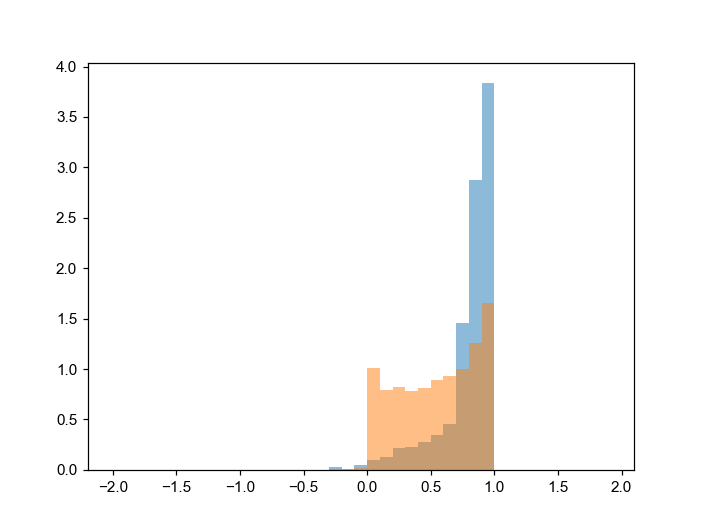

In [277]:
plt.figure()
plt.hist(pos_dist_scores,
         bins=np.arange(-2,2,0.1),
         alpha=0.5, density=True)
plt.hist(neg_dist_scores, 
         bins=np.arange(-2,2,0.1),
         alpha=0.5, density=True)
plt.show()

<IPython.core.display.Javascript object>


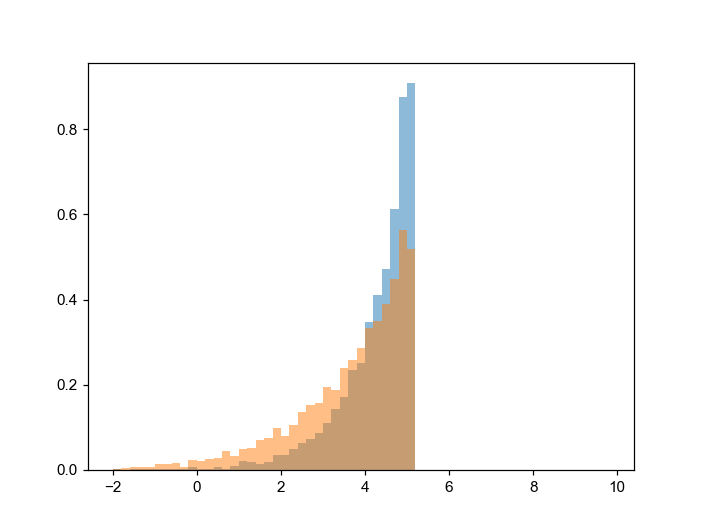

In [278]:
plt.figure()
plt.hist(pos_int_scores,
         bins=np.arange(-2,10,0.2),
         alpha=0.5, density=True)
plt.hist(neg_int_scores, 
         bins=np.arange(-2,10,0.2),
         alpha=0.5, density=True)
plt.show()

In [279]:
def find_seeding_groups(cand_spots, spot_groups, num_cand_pre_region=2):
    # init
    _spot_usage = np.zeros(len(cand_spots))
    # record spots_inds
    for _g in spot_groups:
        _spot_usage[_g.spots_inds] = _spot_usage[_g.spots_inds] + 1
    
    seeding_groups = []
    
    for _g in spot_groups:
        if (_spot_usage[_g.spots_inds] <= 2).all():
            seeding_groups.append(_g)
    print(len(seeding_groups))
    return seeding_groups

In [280]:
seeding_groups = find_seeding_groups(decoder.cand_spots, decoder.spot_groups, )

2459


In [281]:
_s_ints, _s_dists = generate_reference(seeding_groups)

In [301]:
seed_int_scores = generate_int_scores(_s_ints, pos_int_model, 
                                      neg_int_model=neg_dist_model, 
                                      stat_type='cdf')
seed_dist_scores = generate_dist_scores(_s_dists, pos_dist_model, 
                                        neg_dist_model=neg_dist_model, 
                                        stat_type='cdf')

int_score_factor=1.0
dist_score_factor = 2.0
seeding_scores = seed_int_scores * int_score_factor + seed_dist_scores * dist_score_factor

In [303]:
for _g, _s in zip(seeding_groups, seeding_scores):
    _g.score = _s

In [304]:
seeding_groups[0].score

6.51598539803698

In [305]:
seeding_species = np.array([_g.tuple_id for _g in seeding_groups])

In [306]:
seeding_ids, seeding_counts = np.unique(seeding_species, return_counts=True)

 # Kmeans

In [487]:
def assign_groups_to_homologs(_homolog_centers, _spot_tuples, _codebook, _chr_name):
    """Function to assign _spot_tuples into homologs"""
    from itertools import permutations

    
    # initialzie
    _new_homolog_labels = np.ones(len(_spot_tuples), dtype=np.int32) * -1
    # region 
    _chr_region_ids = np.array([_codebook.loc[_codebook['id']==_g.tuple_id, 'chr_order'].values[0] 
                                for _g in _spot_tuples])
    _chr_cand_coords = np.array([_g.centroid_spot().to_positions()[0] for _g in _spot_tuples])

    for _rid in np.sort(_codebook.loc[_codebook['chr']==_chr_name, 'chr_order'].values):
        # matched spot inds for this region
        _inds = np.where(_chr_region_ids==_rid)[0]
        #_cand_groups = [_g for _r, _g in zip(_chr_region_ids, _spot_tuples) if _r == _rid]
        # assign chr
        if len(_inds) >= len(_homolog_centers):
            # for each pair calculate
            _combs, _comb_dists = [], []
            for _c in permutations(_inds, len(_homolog_centers)):
                _combs.append(np.array(_c))
                _comb_dists.append(np.linalg.norm(_homolog_centers - _chr_cand_coords[np.array(_c)], axis=1).sum())
            _sel_comb = _combs[np.argmin(_comb_dists)]
            for _ichr, _ind in enumerate(_sel_comb):
                #print(_new_homolog_labels.shape, _ind, _ichr)
                _new_homolog_labels[_ind] = _ichr 
        elif len(_inds) > 0:
            _chr_combs, _chr_comb_dists = [], []
            for _chr_comb in permutations(np.arange(len(_homolog_centers)), len(_inds)):
                _cts = _homolog_centers[np.array(_chr_comb)]
                _chr_combs.append(_chr_comb)
                _chr_comb_dists.append(np.linalg.norm(_cts - _chr_cand_coords[_inds], axis=1).sum())
            _sel_chr_comb = _chr_combs[np.argmin(_chr_comb_dists)]
            for _ichr, _ind in zip(_sel_chr_comb, _inds):
                #print(_new_homolog_labels.shape, _ind, _ichr)
                _new_homolog_labels[_ind] = _ichr
                
    return _new_homolog_labels

def compare_label_diff(old_labels, new_labels):
    return np.mean(old_labels != new_labels)

def calculate_homolog_centroids(_spot_tuples, _labels):
    _valid_labels = np.unique(_labels)
    _valid_labels = _valid_labels[_valid_labels >= 0]
    _homolog_centers = []
    for _lb in _valid_labels:
        _homolog_centers.append(np.median([_g.centroid_spot().to_positions()[0] 
                                          for _l, _g in zip(_labels, _spot_tuples) if _l==_lb], axis=0))
    return np.array(_homolog_centers)

In [488]:
seeding_groups = find_seeding_groups(decoder.cand_spots, decoder.spot_groups, )

chr_names = np.array([codebook_df.loc[codebook_df['id']==_g.tuple_id, 'chr'].values[0] for _g in seeding_groups])

chr_2_groups = {}
for _chr in np.unique(chr_names):
    chr_2_groups[_chr] = [_g for _n, _g in zip(chr_names, seeding_groups) if _n == _chr]
    

chr_2_homolog_centers = {}
for _chr_name in chr_2_groups:
    print( "*", _chr_name)
    
    chr_cand_coords = np.array([_g.centroid_spot().to_positions()[0] for _g in chr_2_groups[_chr_name]])
    if len(chr_cand_coords) <= 1:
        continue
    from sklearn.cluster import KMeans
    _model = KMeans(n_clusters=2, random_state=0)
    _model.fit(chr_cand_coords)
    homolog_labels = _model.labels_
    homolog_centers = _model.cluster_centers_
    # for each region, assign the best homolog

    # estimate homolog centers
    label_diffs = [1]

    homolog_labels = [_model.labels_]
    homolog_centers = [_model.cluster_centers_]

    while label_diffs[-1] > 0.001:
        homolog_labels.append(assign_groups_to_homologs(homolog_centers[-1], chr_2_groups[_chr_name], codebook_df, _chr_name) )
        # update homolog centers
        homolog_centers.append(calculate_homolog_centroids(chr_2_groups[_chr_name], homolog_labels[-1]) )
        # compare
        label_diffs.append(compare_label_diff(homolog_labels[-1], homolog_labels[-2]))
        print(label_diffs[-1])
    
    # append
    chr_2_homolog_centers[_chr_name] = homolog_centers[-1]

2459
* 1
0.44878048780487806
0.03902439024390244
0.00975609756097561
0.0
* 10
0.42735042735042733
0.03418803418803419
0.0
* 11
0.40707964601769914
0.07079646017699115
0.017699115044247787
0.0
* 12
0.35789473684210527
0.021052631578947368
0.0
* 13
0.41228070175438597
0.03508771929824561
0.0
* 14
0.4077669902912621
0.1262135922330097
0.13592233009708737
0.0
* 15
0.4787234042553192
0.3191489361702128
0.1595744680851064
0.0
* 16
0.41
0.14
0.06
0.02
0.0
* 17
0.37662337662337664
0.1038961038961039
0.0
* 18
0.4803921568627451
0.09803921568627451
0.0392156862745098
0.0
* 19
0.5079365079365079
0.06349206349206349
0.06349206349206349
0.0
* 2
0.4107142857142857
0.1130952380952381
0.047619047619047616
0.011904761904761904
0.0
* 3
0.46
0.09333333333333334
0.04666666666666667
0.06
0.03333333333333333
0.04
0.0
* 4
0.46496815286624205
0.07006369426751592
0.050955414012738856
0.012738853503184714
0.0
* 5
0.37593984962406013
0.07518796992481203
0.015037593984962405
0.0
* 6
0.4860335195530726
0.156424581

# assign all spots

In [489]:
_all_ints, _all_dists = generate_reference(decoder.spot_groups)

all_int_scores = generate_int_scores(_all_ints, pos_int_model, 
                                      neg_int_model=neg_dist_model, 
                                      stat_type='cdf')
all_dist_scores = generate_dist_scores(_all_dists, pos_dist_model, 
                                        neg_dist_model=neg_dist_model, 
                                        stat_type='cdf')

int_score_factor = 1.0
dist_score_factor = 2.0
all_scores = all_int_scores * int_score_factor + all_dist_scores * dist_score_factor

In [490]:
# get all candidate tuples for this chromosome
for _ig, _g in enumerate(decoder.spot_groups):
    _g.chr = codebook_df.loc[codebook_df['id']==_g.tuple_id, 'chr'].values[0]
    _g.chr_order = codebook_df.loc[codebook_df['id']==_g.tuple_id, 'chr_order'].values[0]
    _g.score = all_scores[_ig]


In [519]:
ignore_nan = True
chrs_2_homologs_2_positions = {}



for _chr_name in chr_2_homolog_centers:
    #
    _chr_regions = codebook_df.loc[codebook_df['chr']==_chr_name, 'chr_order'].values
    #
    _chr_spot_tuples = [_g for _g in decoder.spot_groups if _g.chr==_chr_name]
    _homolog_cts = chr_2_homolog_centers[_chr_name]
    _chr_spot_labels = assign_groups_to_homologs(_homolog_cts, _chr_spot_tuples, codebook_df, _chr_name) 
    
    _homologs_2_region_tuple_dict = {}
    for _l in np.unique(_chr_spot_labels[_chr_spot_labels >= 0]):
        _regions_to_tuples = {_r:[] for _r in _chr_regions}
        for _ind in np.where(_chr_spot_labels==_l)[0]:
            _regions_to_tuples[_chr_spot_tuples[_ind].chr_order].append(_chr_spot_tuples[_ind])

        # append
        _homologs_2_region_tuple_dict[_l] = _regions_to_tuples

    _homologs_2_positions = {}
    for _l, _region_2_tuple in _homologs_2_region_tuple_dict.items():
        _coords = []
        for _r, _gs in _region_2_tuple.items():
            if len(_gs) > 0:
                _coord = _gs[0].centroid_spot().to_positions()[0]
            else:
                if ignore_nan:
                    continue
                else:
                    _coord = np.nan * np.ones(3)

            _coords.append(_coord)
        _homologs_2_positions[f"{_chr_name}_{_l}"] = np.array(_coords)

    chrs_2_homologs_2_positions.update(_homologs_2_positions)

In [ ]:
homolog_labels = 

In [541]:
homolog_labels = np.concatenate([[_i]*len(_v) for _i,(_k, _v) in enumerate(chrs_2_homologs_2_positions.items())])
cell_coords = np.concatenate(list(chrs_2_homologs_2_positions.values()))


In [544]:
def rotate(angle):
     ax.view_init(azim=angle)

<IPython.core.display.Javascript object>


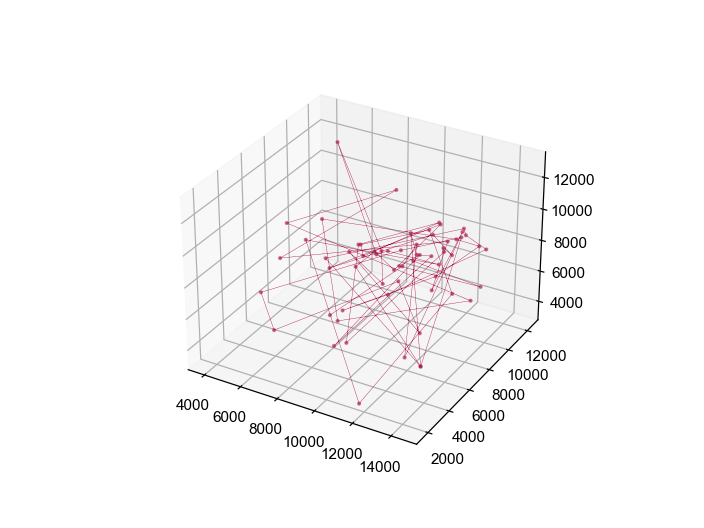

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [577]:
from matplotlib import animation

from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

chrom_coords = chrs_2_homologs_2_positions['2_0']

ax.scatter(chrom_coords[:,1], chrom_coords[:,2], chrom_coords[:,0],
           cmap=Spectral, 
           c=Spectral(1/(np.max(homolog_labels)+1)),
           #c=homolog_labels,
           alpha=0.5,
           s=3)

ax.plot(chrom_coords[:,1], chrom_coords[:,2], chrom_coords[:,0], linewidth=0.25,
        color = Spectral(1/(np.max(homolog_labels)+1)) )

<IPython.core.display.Javascript object>


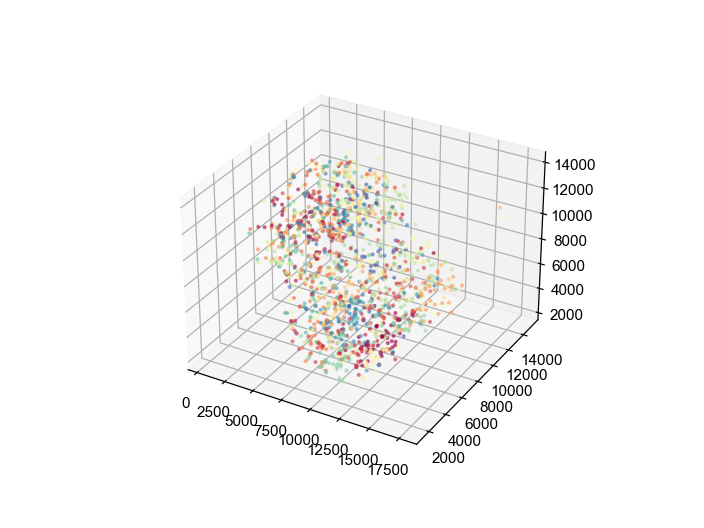

In [580]:
from matplotlib import animation

from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(cell_coords[:,1], cell_coords[:,2], cell_coords[:,0],
           #cmap=Spectral, 
           c=Spectral(homolog_labels/(np.max(homolog_labels)+1)),
           #c=homolog_labels,
           alpha=0.5,
           s=3)
#for _i, (_chr, chrom_coords) in enumerate(chrs_2_homologs_2_positions.items()):
#    ax.plot(chrom_coords[:,1], chrom_coords[:,2], chrom_coords[:,0], linewidth=0.25, alpha=0.5,
#        color = Spectral(_i/(np.max(homolog_labels)+1)) )

In [581]:
angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save(os.path.join(figure_folder, 'decoded_cell.gif'), writer=animation.PillowWriter(fps=20))

In [640]:
len(chrs_2_homologs_2_positions)

40

In [639]:
len(figure_labels)

41

In [657]:
figure_labels = [0]

for _homolog, _coords in chrs_2_homologs_2_positions.items():
    figure_labels.append(np.max(figure_labels)+len(_coords))
figure_label_mids = (np.array(figure_labels[1:]) + np.array(figure_labels)[:-1])/2

1778

<IPython.core.display.Javascript object>


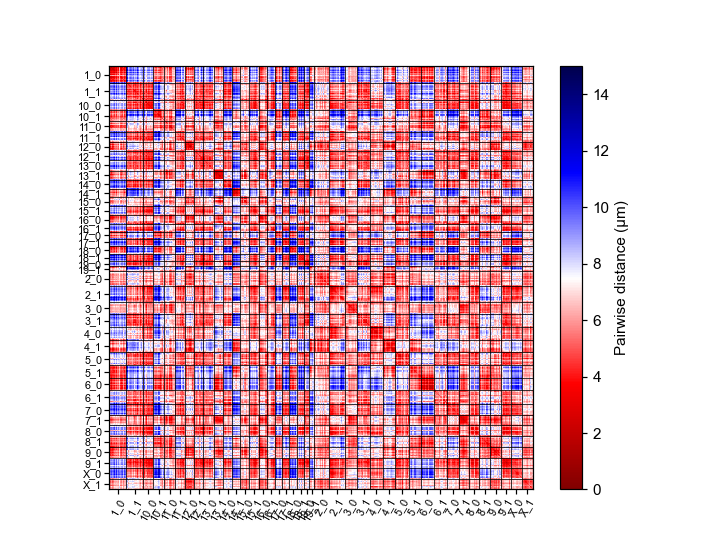

In [670]:
from scipy.spatial.distance import pdist, squareform

_distmap = squareform(pdist(np.concatenate(list(chrs_2_homologs_2_positions.values()))/1000 ))

fig, ax = plt.subplots(figsize=(6.5,5))
_pf = ax.imshow(_distmap, cmap='seismic_r', vmin=0, vmax=15)
plt.colorbar(_pf, label=f'Pairwise distance (\u03bcm)')

ax.set_xticks(figure_label_mids)
ax.set_xticklabels(list(chrs_2_homologs_2_positions.keys()), fontsize=7, rotation=60,)
ax.set_yticks(figure_label_mids)
ax.set_yticklabels(list(chrs_2_homologs_2_positions.keys()), fontsize=7,)
ax.tick_params(axis='both', which='major', pad=1)

#for _l in figure_labels:
ax.hlines(figure_labels, 0, len(_distmap), 
          color='black', linewidth=0.5)
ax.vlines(figure_labels, 0, len(_distmap), 
          color='black', linewidth=0.5)
ax.set_xlim([0, len(_distmap)])
ax.set_ylim([len(_distmap), 0])

fig.savefig(os.path.join(figure_folder, 'example_cell_distmap.png'), dpi=200, transparent=True)


In [414]:
homolog_centers

[array([[ 4540.51244692, 11970.03364563,  6540.21291275],
        [ 9586.62221306,  3576.93425361,  8281.24947745]]),
 array([[ 3921.47445679, 11828.42578125,  6657.98304749],
        [ 9206.70890808,  3909.0191803 ,  8291.14892578]]),
 array([[ 3849.3719101 , 11811.27392578,  6657.98304749],
        [ 9185.27030945,  4015.08119202,  8226.37792969]]),
 array([[ 3849.3719101 , 11744.64404297,  6676.68603516],
        [ 9185.27030945,  4015.08119202,  8226.37792969]]),
 array([[ 3849.3719101 , 11744.64404297,  6676.68603516],
        [ 9185.27030945,  4015.08119202,  8226.37792969]])]

In [400]:
homolog_centers

array([[ 4540.51244692, 11970.03364563,  6540.21291275],
       [ 9586.62221306,  3576.93425361,  8281.24947745]])

In [395]:
compare_label_diff(new_homolog_labels, _model.labels_)

0.44878048780487806

In [388]:
#
new_homolog_labels = assign_groups_to_homologs(homolog_centers, chr_2_groups[_chr_name], codebook_df)

<IPython.core.display.Javascript object>


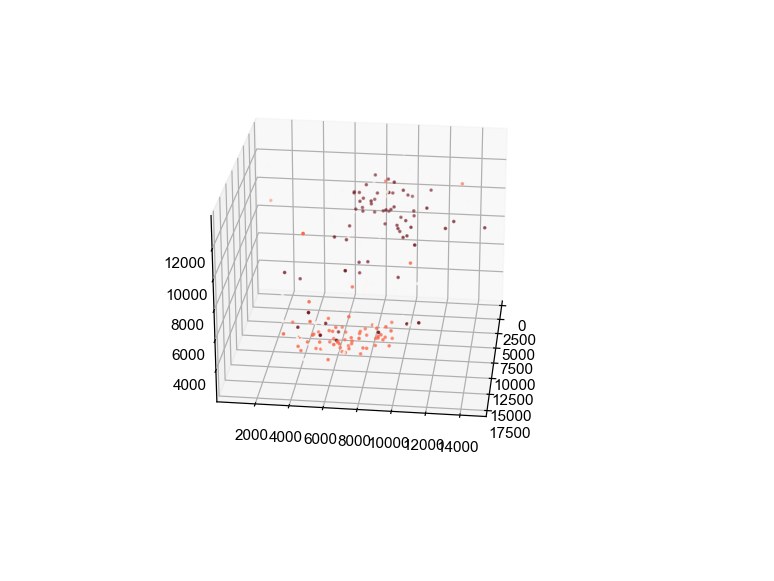

In [415]:
from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(chr_cand_coords[:,1], chr_cand_coords[:,2], chr_cand_coords[:,0],
           cmap=Reds, 
           #c=_model.labels_,
           c=homolog_labels[-1],
           s=2)
plt.show()

In [317]:
chr_cand_coords.shape

(205, 3)

In [295]:
for _g in chr_2_groups['1']:
    print(_g.centroid_spot().to_positions())

[[ 6201.57146454 13934.29394531  7081.48168945]]
[[9191.94698334 2466.95361328 8087.87109375]]
[[10735.02731323  2160.98876953  6658.81567383]]
[[ 3490.92078209 10323.22439575  7794.78250122]]
[[ 3212.05329895 14182.00543213  4427.99546814]]
[[ 2913.81859779 10848.64086914  6085.40638733]]
[[12818.05610657 17167.93945312  4810.58789062]]
[[ 5900.66194534 14524.39654541  5154.99156189]]
[[10144.86789703  1550.74658203  8601.08615112]]
[[ 5682.44409561 13936.59283447  3152.25      ]]
[[6589.43796158 5387.47558594 6853.9855957 ]]
[[ 8185.34183502 12741.35009766 11052.46582031]]
[[7114.26496506 3709.24694824 6734.46313477]]
[[9821.56562805 3360.19812012 8837.35839844]]
[[3481.89854622 9967.26901245 6480.2109375 ]]
[[ 4088.42992783 10575.45043945  8312.68185425]]
[[10298.16436768  2129.29767609  7687.44168091]]
[[ 4052.58321762 10929.59472656  3660.13023376]]
[[10240.03505707  1572.72363281  6673.68470764]]
[[9608.17337036 1442.14343262 7456.96362305]]
[[5780.90143204 5209.67834473 6868.131

<IPython.core.display.Javascript object>


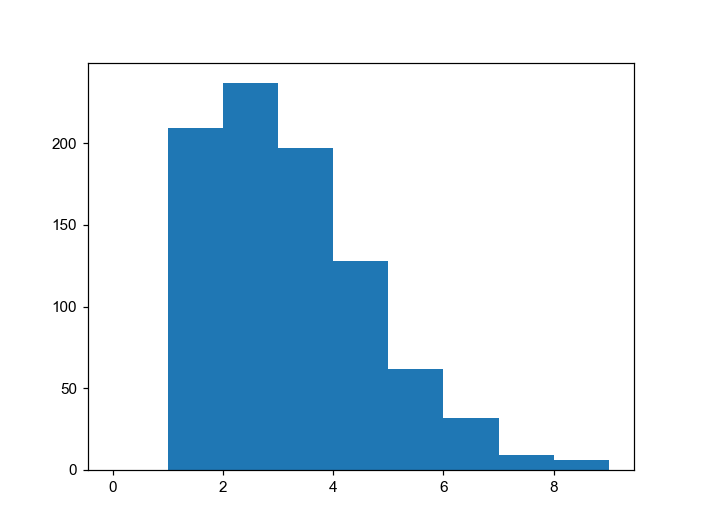

(array([  0., 209., 237., 197., 128.,  62.,  32.,   9.,   6.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

In [210]:
plt.figure()
plt.hist(seeding_counts, bins=np.arange(10))

In [165]:
# find isolated_tuple
def ind_usage(self, all_inds):
    if isinstance(all_inds, list) and isinstance(all_inds[0], np.ndarray):
        _all_inds = np.concatenate(all_inds)
    else:
        _all_inds = np.array(all_inds)
    _matches = []
    for _ind in self.spots_inds:
        _matches.append(np.sum(_all_inds==_ind))
    
    return np.array(_matches)

In [77]:
int_model.pdf(3), dist_model.pdf(100)

(0.10175178569785034, 0.01056846059635673)

In [ ]:
aa

In [35]:
valid_interdists = [np.min(_g.dist_internal()) for _g in spot_groups]

In [734]:
scipy.stats.describe(invalid_intensities)

DescribeResult(nobs=11573, minmax=(0.092282385, 7.410349), mean=1.2738798, variance=0.7410131, skewness=1.648376226425171, kurtosis=3.804843330721398)

In [730]:
scipy.stats.describe(valid_interdists)

DescribeResult(nobs=3378, minmax=(0.33158034, 6.7230897), mean=1.6433207, variance=0.70206547, skewness=1.360861897468567, kurtosis=2.602253875855612)

In [763]:
from scipy.stats import gamma, alpha

In [781]:
np.

AttributeError: module 'numpy' has no attribute 'stderr'

In [782]:
valid_int_stds = [np.std(_g.intensities())/len(_g.spots) for _g in spot_groups]

In [783]:
invalid_int_stds = [np.std(_g.intensities())/len(_g.spots) for _g in invalid_pairs]

<IPython.core.display.Javascript object>


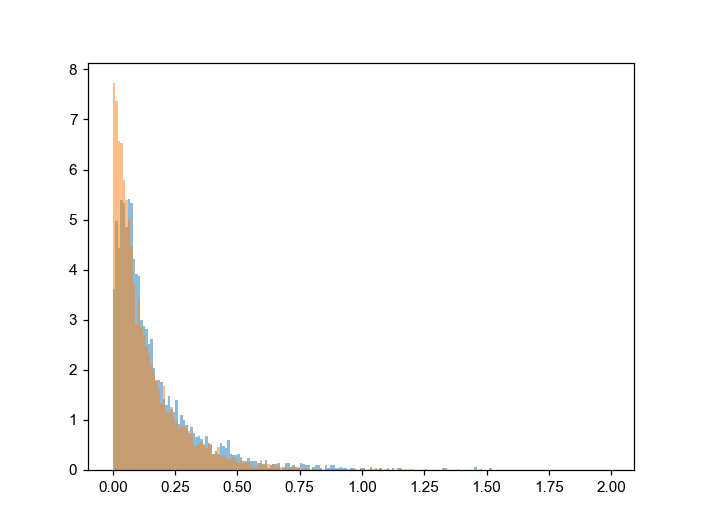

In [785]:
plt.figure()
plt.hist(valid_int_stds, bins=np.arange(0,2,0.01), alpha=0.5, density=True, label='valid')
plt.hist(invalid_int_stds, bins=np.arange(0,2,0.01), alpha=0.5, density=True, label='invalid')
plt.show()

In [733]:
gamma.fit?

In [816]:
neg_gamma_params = gamma.fit(invalid_intensities)
neg_pdf = gamma(*neg_gamma_params).cdf(np.arange(0,5,0.2))

In [817]:
pos_gamma_params = gamma.fit(valid_intensities)
pos_pdf = gamma(*pos_gamma_params).cdf(np.arange(0,5,0.2))

In [818]:
print(pos_gamma_params, neg_gamma_params)

(2.5981782390118733, 0.3205443773481341, 0.5089996771909544) (2.220959149231555, 0.09171764775931325, 0.5322550643310122)


In [823]:
dists = np.arange(0.4,5,0.2)
for dist in dists:
    print(dist, np.log(gamma(*neg_gamma_params).cdf(dist)/gamma(*pos_gamma_params).cdf(dist)) )

0.4 3.7385609195334784
0.6000000000000001 1.6153036335221085
0.8000000000000002 0.9842503244848326
1.0000000000000002 0.665955200257133
1.2000000000000002 0.4732221428962882
1.4000000000000004 0.3452351535072991
1.6000000000000005 0.25560907051912535
1.8000000000000003 0.19078617771345008
2.0000000000000004 0.14295940545138497
2.2000000000000006 0.10724671366294722
2.400000000000001 0.08040075655731187
2.6000000000000005 0.06015871796746507
2.8000000000000007 0.044888546916556686
3.000000000000001 0.033383748869165134
3.2000000000000006 0.024737411636521652
3.400000000000001 0.01826072731166542
3.600000000000001 0.013427688598442235
3.800000000000001 0.009835903287948476
4.000000000000002 0.007177819490575381
4.200000000000001 0.0052190147244926
4.400000000000002 0.003781510802240116
4.600000000000001 0.002730814315691874
4.800000000000002 0.001965806456126518


<IPython.core.display.Javascript object>


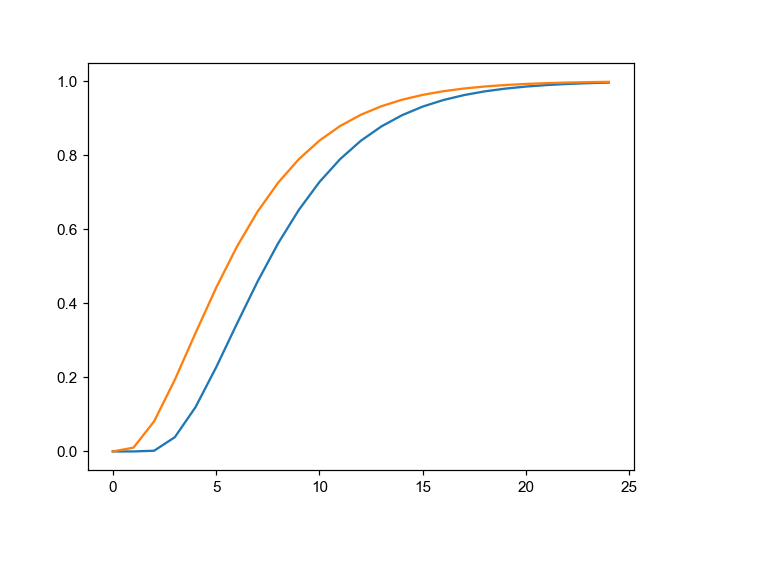

In [824]:
plt.figure()
plt.plot(pos_pdf)
plt.plot(neg_pdf)

In [810]:
pos_gamma_params = gamma.fit(valid_interdists)
pos_pdf = gamma(*pos_gamma_params).cdf(np.arange(0,1000))

In [811]:
neg_gamma_params = gamma.fit(np.ravel(_nb_dists[:,1:]))
neg_pdf = gamma(*neg_gamma_params).cdf(np.arange(0,1000))

In [812]:
dists = np.arange(0,500,25)
for dist in dists:
    print(dist, np.log(gamma(*pos_gamma_params).cdf(dist)/gamma(*neg_gamma_params).cdf(dist)) )

0 4.884660754112405
25 2.025960678000396
50 1.637939219651474
75 1.5660621873384728
100 1.4792732185760673
125 1.3159194749713188
150 1.099630675816829
175 0.8768793830502072
200 0.681372713673124
225 0.5237567613665366
250 0.4007933497672148
275 0.30570675304345135
300 0.2323590087307864
325 0.17590620276154548
350 0.13259081607428228
375 0.09948425510060627
400 0.07429296663567289
425 0.055217198877706035
450 0.04084555326958599
475 0.030074086506892566


<IPython.core.display.Javascript object>


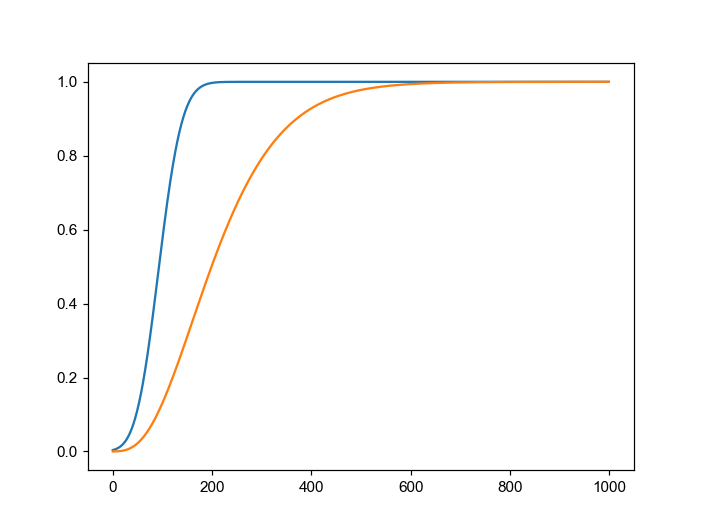

In [813]:
plt.figure()
plt.plot(pos_pdf)
plt.plot(neg_pdf)

In [757]:
invalid_intensities

array([4.76721   , 4.4317465 , 3.24223   , ..., 0.4653694 , 0.48551267,
       0.5277241 ], dtype=float32)

<IPython.core.display.Javascript object>


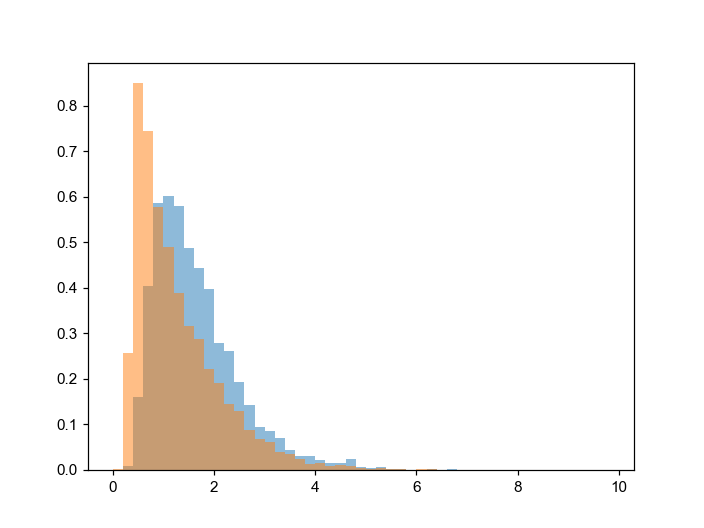

In [754]:
plt.figure()
plt.hist(valid_intensities, bins=np.arange(0,10,0.2), alpha=0.5, density=True)
plt.hist(invalid_intensities, bins=np.arange(0,10,0.2), alpha=0.5, density=True)
plt.show()

In [729]:
def intensity_score(spot_tuple, statistic='cdf', metric='mean'):
    return np.

array([4.76721   , 0.93290687], dtype=float32)

In [707]:
_nb_dists, _nb_inds = list(decoder.kdtree.query(unused_spots.to_positions(), 3) )

<IPython.core.display.Javascript object>


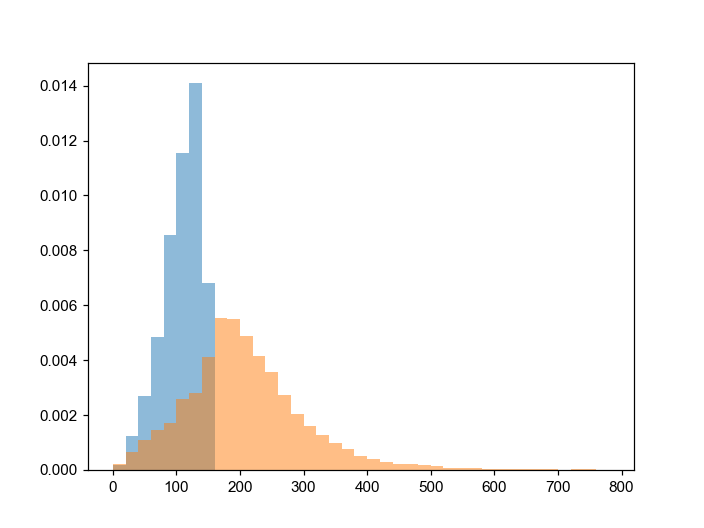

(array([2.02799948e-04, 6.60735313e-04, 1.09032230e-03, 1.45230930e-03,
        1.71398665e-03, 2.56661869e-03, 2.79340573e-03, 4.10397313e-03,
        5.53883728e-03, 5.50394697e-03, 4.87592132e-03, 4.16285054e-03,
        3.57407650e-03, 2.72798639e-03, 2.04108334e-03, 1.60931571e-03,
        1.25823193e-03, 9.76928780e-04, 7.47961097e-04, 5.03728902e-04,
        3.92516028e-04, 2.79122509e-04, 2.09341881e-04, 2.00619303e-04,
        1.70090279e-04, 1.33019321e-04, 6.75999826e-05, 7.41419164e-05,
        5.66967596e-05, 3.92516028e-05, 4.14322474e-05, 4.36128920e-05,
        2.83483798e-05, 4.57935366e-05, 4.36128920e-05, 1.52645122e-05,
        1.96258014e-05, 2.18064460e-05, 1.30838676e-05]),
 array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
        260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500,
        520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760,
        780]),
 <BarContainer object of 39 artists>)

In [708]:
plt.hist(valid_interdists, bins=np.arange(0,800,20), alpha=0.5, density=True)
plt.hist(np.ravel(_nb_dists[:,1:]), bins=np.arange(0,800,20), alpha=0.5, density=True)

In [651]:
invalid_neighbors = [_n[1:] for _n in invalid_neighbors]

In [652]:
invalid_neighbors

[array([[  0.        , 156.9623613 ],
        [  0.        ,  64.97783254],
        [  0.        , 157.80472183],
        ...,
        [  0.        , 201.02319512],
        [  0.        ,  94.31194786],
        [  0.        , 122.97247228]]), array([[    1, 15236],
        [    7,  4472],
        [    8, 16374],
        ...,
        [17524,  6107],
        [17525, 14809],
        [17527,  6004]], dtype=int64)]

In [631]:
anp.where(spot_usage>0)[0]

array([    2,     3,     4, ..., 17526, 17528, 17529], dtype=int64)

<IPython.core.display.Javascript object>


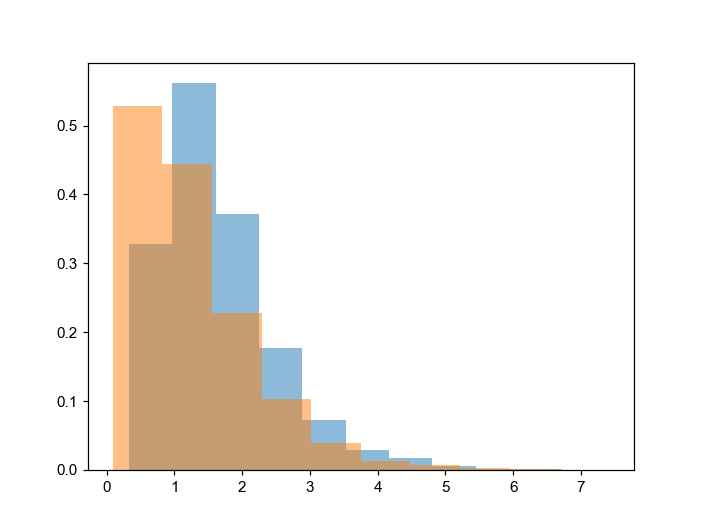

(array([5.28092712e-01, 4.44442638e-01, 2.27943503e-01, 1.02763333e-01,
        3.96423548e-02, 1.29781476e-02, 6.60705698e-03, 2.35966475e-03,
        1.17983160e-03, 4.71932642e-04]),
 array([0.09228238, 0.82408905, 1.5558957 , 2.2877023 , 3.019509  ,
        3.7513156 , 4.4831223 , 5.214929  , 5.9467354 , 6.678542  ,
        7.410349  ], dtype=float32),
 <BarContainer object of 10 artists>)

In [641]:
plt.hist(valid_intensities,alpha=0.5, density=True)
plt.hist(invalid_intensities,alpha=0.5, density=True)

In [556]:
spot_groups = assemble_complete_codes(decoder)

7700it [00:07, 977.20it/s] 

4611


In [ ]:
def partition_spots

In [560]:
np.unique([_g.tuple_id for _g in spot_groups])

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   80,
         81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   91,
         92,   93,   94,   95,   96,   97,   98,   99,  100,  101,  102,
        103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,
        114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  124,
        125,  126,  127,  128,  129,  130,  131,  132,  133,  134,  135,
        136,  137,  138,  140,  141,  142,  143,  144,  145,  146,  147,
        148,  150,  151,  153,  154,  155,  156,  1

In [546]:
spot_groups[0].centroid_spot().to_positions()

array([[ 4254.02545929, 13088.48318481,  4846.04722595]])

In [547]:
sel_spot.to_positions()

array([[ 4200.41751862, 13111.13671875,  4852.44580078],
       [ 4311.65885925, 13086.31201172,  4825.69628906],
       [ 4250.        , 13068.        ,  4860.        ]])

In [511]:
sel_spot[0].bits

array([22])

In [467]:
np.array([1,2,3,4]) in np.array([1,2])

E:\Users\puzheng\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [361]:
spots = Spots3D(fov.combo_spots_list[0], bits=np.arange(len(fov.combo_spots_list[0])), pixel_sizes=pixel_sizes
               )

In [362]:
sel_crop = ImageCrop_3d([[0,60],[920,1090],[1280,1420]])

In [301]:
fov._load_from_file('combo')
pixel_sizes = np.array(fov.shared_parameters['distance_zxy'])
bits = np.array(fov.combo_ids)+1
spots_list = [Spots3D(_spots, bits=_bit, pixel_sizes=pixel_sizes) for _spots, _bit in zip(fov.combo_spots_list, bits)]
spots_list = [Normalize_Intensities(_spots, _spots) for _spots in spots_list]


+ loading combo from file: D:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only_warpped\Conv_zscan_07.hdf5


In [302]:
# select candidate spots within this crop
cand_spots_list = []
for _bit, _spots in zip(bits, spots_list):
    _kept_spots = sel_crop.crop_spots(_spots)
    # append
    cand_spots_list.append((_kept_spots))
    
# merge
cand_spots = Spots3D(np.concatenate(cand_spots_list), 
                      bits=np.concatenate([_spots.bits for _spots in cand_spots_list]), 
                      pixel_sizes=fov.shared_parameters['distance_zxy'])
cand_coords = cand_spots.to_positions()

In [395]:
cand_spots_list[0].to_positions()

array([[ 5104.70962524, 14473.76660156,  4727.88720703],
       [ 5672.13153839, 11367.92285156, 12357.91845703],
       [ 8686.42711639,  6256.34033203,  6266.82128906],
       [10635.0479126 ,  4159.29858398,  7083.74267578],
       [ 7139.37473297, 10423.66113281,  4510.13378906],
       [ 8546.70143127,  4725.15161133,  8293.89111328],
       [ 3206.43687248, 10591.11254883,  6346.23925781],
       [ 5680.18007278, 15082.30810547,  9602.89013672],
       [ 4955.04570007, 14973.51708984,  8462.16650391],
       [ 4613.77763748, 14098.48242188,  2790.53173828],
       [ 5750.        ,  8964.        ,  7560.        ],
       [ 4150.85268021,  8845.06420898,  5017.84716797],
       [ 7022.65167236, 14992.65966797,  6355.13818359],
       [ 8844.10953522,  4210.43115234,  7145.04638672],
       [ 9559.9565506 ,  3325.87133789,  4799.34228516],
       [ 8255.18798828,  9496.36669922,  8634.95068359],
       [ 6743.11733246, 13844.14453125, 11171.32910156],
       [ 7352.5800705 ,  9321.3

In [303]:
pair_dist = 150

from scipy.spatial import KDTree
tree = KDTree(cand_coords)

kdtree_spot_pairs = tree.query_pairs(pair_dist, eps=0.5)
print(len(kdtree_spot_pairs))

8904


In [399]:
cand_spots[np.array(kdtree_spot_pairs[0])]

TypeError: 'set' object is not subscriptable

In [403]:
list(kdtree_spot_pairs)[0]

(1322, 6984)

In [343]:
np.arange(10)[np.array((1,3))]

array([1, 3])

In [345]:
np.array(_p)

array([41, 76], dtype=int64)

In [344]:
# analyze valid pairs from codebook
from itertools import combinations

valid_pairs = []
valid_pair_species = []
for _icode, _code in enumerate(codebook):
    for _p in combinations(np.where(_code)[0], 2):
        if _p not in valid_pairs:
            valid_pairs.append(_p)
            valid_pair_species.append(_icode)
        else:
            print(_icode, valid_pairs)

In [325]:
sel_spots_groups = []
group_species = []
_inds_list = []

for _p in tqdm(kdtree_spot_pairs):
    # get codes for this pair
    _code_pair = tuple(cand_spots.bits[np.array(_p)])
    if _code_pair in valid_pairs:

        _bts = cand_spots.bits[np.array(_p)]
        _spots = cand_spots[np.array(_p)]
        _species = valid_pair_species[valid_pairs.index(tuple(_sp.bits))]

        _sp = SpotTuple(_spots, 
                        bits=_bts, 
                        pixel_sizes=fov.shared_parameters['distance_zxy'],
                        spots_inds=np.array(list(_p)),
                        tuple_id=_species,)
        
        # find matched bits
        _matched_bits = np.setdiff1d(np.where(codebook[_species])[0], _sp.bits)

        #print(_p, _sp.bits, _sp.centroid_spot(), _matched_bits)
        _nb_spot_ids = np.array(tree.query_ball_point(_sp.centroid_spot().to_positions(_sp.pixel_sizes)[0], pair_dist*1.5))
        _nb_spot_ids = np.setdiff1d(_nb_spot_ids, _p) # exclude self

        if len(_nb_spot_ids) > 0:
            _nb_spots = Spots3D(cand_spots[_nb_spot_ids], bits=cand_spots.bits[_nb_spot_ids], pixel_sizes=_sp.pixel_sizes)
            _matched_nb_indices = np.array([_i for _i, _b in enumerate(_nb_spots.bits) if _b in _matched_bits])
            if len(_matched_nb_indices) > 0:
                _matched_nb_spots = _nb_spots[_matched_nb_indices]
                _matched_nb_dists = _sp.dist_centroid_to_spots(_matched_nb_spots)

                for _matched_nb_id, _matched_nb_spot in zip(_nb_spot_ids, _matched_nb_spots):
                    # only select the closest one
                    #_matched_nb_id = _nb_spot_ids[np.argmin(_matched_nb_dists)]
                    #_matched_nb_spot = _matched_nb_spots[np.argmin(_matched_nb_dists)]
                    group_species.append(_species)
                    # merge spots
                    _merged_spots = Spots3D(np.concatenate([_sp.spots, [_matched_nb_spot]]),
                                            bits=np.concatenate([_sp.bits, [cand_spots.bits[_matched_nb_id]]]),
                                            pixel_sizes=pixel_sizes, 
                                            )

                    _merged_tuple = SpotTuple(_merged_spots, 
                                              bits=np.concatenate([_sp.bits, [cand_spots.bits[_matched_nb_id]]]), 
                                              pixel_sizes=_sp.pixel_sizes,
                                              spots_inds=np.array(list(_p)+[_matched_nb_id]),
                                              tuple_id=_species,
                                              )
                    if tuple(np.sort(_merged_tuple.spots_inds)) not in _inds_list:
                        sel_spots_groups.append(_merged_tuple)
                        _inds_list.append(tuple(np.sort(_merged_tuple.spots_inds)))
            else:
                _merged_tuple = SpotTuple(_sp.spots, 
                                        bits=_sp.bits, 
                                        pixel_sizes=_sp.pixel_sizes,
                                        spots_inds=np.array(list(_p)),
                                        tuple_id=_species,
                                        )
                if tuple(np.sort(_merged_tuple.spots_inds)) not in _inds_list:
                    sel_spots_groups.append(_merged_tuple)
                    _inds_list.append(tuple(np.sort(_merged_tuple.spots_inds)))

100%|█████████████████████████████████████████████████████████████████████████████| 8904/8904 [00:38<00:00, 230.53it/s]


In [ ]:
def intensity_scores(spot_tuple, )

In [326]:
for _i, _g in enumerate(sel_spots_groups):
    print(_i, _g.spots, _g.spots.pixel_sizes)
    #_g.spots.to_positions()
    
    

0  [250 108 108]
1  [250 108 108]
2  [250 108 108]
3  [250 108 108]
4  [250 108 108]
5  [250 108 108]
6  [250 108 108]
7  [250 108 108]
8  [250 108 108]
9  [250 108 108]
10  [250 108 108]
11  [250 108 108]
12  [250 108 108]
13  [250 108 108]
14  [250 108 108]
15  [250 108 108]
16  [250 108 108]
17  [250 108 108]
18  [250 108 108]
19  [250 108 108]
20  [250 108 108]
21  [250 108 108]
22  [250 108 108]
23  [250 108 108]
24  [250 108 108]
25  [250 108 108]
26  [250 108 108]
27  [250 108 108]
28  [250 108 108]
29  [250 108 108]
30  [250 108 108]
31  [250 108 108]
32  [250 108 108]
33  [250 108 108]
34  [250 108 108]
35  [250 108 108]
36  [250 108 108]
37  [250 108 108]
38  [250 108 108]
39  [250 108 108]
40  [250 108 108]
41  [250 108 108]
42  [250 108 108]
43  [250 108 108]
44  [250 108 108]
45  [250 108 108]
46  [250 108 108]
47  [250 108 108]
48  [250 108 108]
49  [250 108 108]
50  [250 108 108]
51  [250 108 108]
52  [250 108 108]
53  [250 108 108]
54  [250 108 108]
55  [250 108 108]
56

460  [250 108 108]
461  [250 108 108]
462  [250 108 108]
463  [250 108 108]
464  [250 108 108]
465  [250 108 108]
466  [250 108 108]
467  [250 108 108]
468  [250 108 108]
469  [250 108 108]
470  [250 108 108]
471  [250 108 108]
472  [250 108 108]
473  [250 108 108]
474  [250 108 108]
475  [250 108 108]
476  [250 108 108]
477  [250 108 108]
478  [250 108 108]
479  [250 108 108]
480  [250 108 108]
481  [250 108 108]
482  [250 108 108]
483  [250 108 108]
484  [250 108 108]
485  [250 108 108]
486  [250 108 108]
487  [250 108 108]
488  [250 108 108]
489  [250 108 108]
490  [250 108 108]
491  [250 108 108]
492  [250 108 108]
493  [250 108 108]
494  [250 108 108]
495  [250 108 108]
496  [250 108 108]
497  [250 108 108]
498  [250 108 108]
499  [250 108 108]
500  [250 108 108]
501  [250 108 108]
502  [250 108 108]
503  [250 108 108]
504  [250 108 108]
505  [250 108 108]
506  [250 108 108]
507  [250 108 108]
508  [250 108 108]
509  [250 108 108]
510  [250 108 108]
511  [250 108 108]
512  [250 10

913  [250 108 108]
914  [250 108 108]
915  [250 108 108]
916  [250 108 108]
917  [250 108 108]
918  [250 108 108]
919  [250 108 108]
920  [250 108 108]
921  [250 108 108]
922  [250 108 108]
923  [250 108 108]
924  [250 108 108]
925  [250 108 108]
926  [250 108 108]
927  [250 108 108]
928  [250 108 108]
929  [250 108 108]
930  [250 108 108]
931  [250 108 108]
932  [250 108 108]
933  [250 108 108]
934  [250 108 108]
935  [250 108 108]
936  [250 108 108]
937  [250 108 108]
938  [250 108 108]
939  [250 108 108]
940  [250 108 108]
941  [250 108 108]
942  [250 108 108]
943  [250 108 108]
944  [250 108 108]
945  [250 108 108]
946  [250 108 108]
947  [250 108 108]
948  [250 108 108]
949  [250 108 108]
950  [250 108 108]
951  [250 108 108]
952  [250 108 108]
953  [250 108 108]
954  [250 108 108]
955  [250 108 108]
956  [250 108 108]
957  [250 108 108]
958  [250 108 108]
959  [250 108 108]
960  [250 108 108]
961  [250 108 108]
962  [250 108 108]
963  [250 108 108]
964  [250 108 108]
965  [250 10

1362  [250 108 108]
1363  [250 108 108]
1364  [250 108 108]
1365  [250 108 108]
1366  [250 108 108]
1367  [250 108 108]
1368  [250 108 108]
1369  [250 108 108]
1370  [250 108 108]
1371  [250 108 108]
1372  [250 108 108]
1373  [250 108 108]
1374  [250 108 108]
1375  [250 108 108]
1376  [250 108 108]
1377  [250 108 108]
1378  [250 108 108]
1379  [250 108 108]
1380  [250 108 108]
1381  [250 108 108]
1382  [250 108 108]
1383  [250 108 108]
1384  [250 108 108]
1385  [250 108 108]
1386  [250 108 108]
1387  [250 108 108]
1388  [250 108 108]
1389  [250 108 108]
1390  [250 108 108]
1391  [250 108 108]
1392  [250 108 108]
1393  [250 108 108]
1394  [250 108 108]
1395  [250 108 108]
1396  [250 108 108]
1397  [250 108 108]
1398  [250 108 108]
1399  [250 108 108]
1400  [250 108 108]
1401  [250 108 108]
1402  [250 108 108]
1403  [250 108 108]
1404  [250 108 108]
1405  [250 108 108]
1406  [250 108 108]
1407  [250 108 108]
1408  [250 108 108]
1409  [250 108 108]
1410  [250 108 108]
1411  [250 108 108]


1817  [250 108 108]
1818  [250 108 108]
1819  [250 108 108]
1820  [250 108 108]
1821  [250 108 108]
1822  [250 108 108]
1823  [250 108 108]
1824  [250 108 108]
1825  [250 108 108]
1826  [250 108 108]
1827  [250 108 108]
1828  [250 108 108]
1829  [250 108 108]
1830  [250 108 108]
1831  [250 108 108]
1832  [250 108 108]
1833  [250 108 108]
1834  [250 108 108]
1835  [250 108 108]
1836  [250 108 108]
1837  [250 108 108]
1838  [250 108 108]
1839  [250 108 108]
1840  [250 108 108]
1841  [250 108 108]
1842  [250 108 108]
1843  [250 108 108]
1844  [250 108 108]
1845  [250 108 108]
1846  [250 108 108]
1847  [250 108 108]
1848  [250 108 108]
1849  [250 108 108]
1850  [250 108 108]
1851  [250 108 108]
1852  [250 108 108]
1853  [250 108 108]
1854  [250 108 108]
1855  [250 108 108]
1856  [250 108 108]
1857  [250 108 108]
1858  [250 108 108]
1859  [250 108 108]
1860  [250 108 108]
1861  [250 108 108]
1862  [250 108 108]
1863  [250 108 108]
1864  [250 108 108]
1865  [250 108 108]
1866  [250 108 108]


2270  [250 108 108]
2271  [250 108 108]
2272  [250 108 108]
2273  [250 108 108]
2274  [250 108 108]
2275  [250 108 108]
2276  [250 108 108]
2277  [250 108 108]
2278  [250 108 108]
2279  [250 108 108]
2280  [250 108 108]
2281  [250 108 108]
2282  [250 108 108]
2283  [250 108 108]
2284  [250 108 108]
2285  [250 108 108]
2286  [250 108 108]
2287  [250 108 108]
2288  [250 108 108]
2289  [250 108 108]
2290  [250 108 108]
2291  [250 108 108]
2292  [250 108 108]
2293  [250 108 108]
2294  [250 108 108]
2295  [250 108 108]
2296  [250 108 108]
2297  [250 108 108]
2298  [250 108 108]
2299  [250 108 108]
2300  [250 108 108]
2301  [250 108 108]
2302  [250 108 108]
2303  [250 108 108]
2304  [250 108 108]
2305  [250 108 108]
2306  [250 108 108]
2307  [250 108 108]
2308  [250 108 108]
2309  [250 108 108]
2310  [250 108 108]
2311  [250 108 108]
2312  [250 108 108]
2313  [250 108 108]
2314  [250 108 108]
2315  [250 108 108]
2316  [250 108 108]
2317  [250 108 108]
2318  [250 108 108]
2319  [250 108 108]


2742  [250 108 108]
2743  [250 108 108]
2744  [250 108 108]
2745  [250 108 108]
2746  [250 108 108]
2747  [250 108 108]
2748  [250 108 108]
2749  [250 108 108]
2750  [250 108 108]
2751  [250 108 108]
2752  [250 108 108]
2753  [250 108 108]
2754  [250 108 108]
2755  [250 108 108]
2756  [250 108 108]
2757  [250 108 108]
2758  [250 108 108]
2759  [250 108 108]
2760  [250 108 108]
2761  [250 108 108]
2762  [250 108 108]
2763  [250 108 108]
2764  [250 108 108]
2765  [250 108 108]
2766  [250 108 108]
2767  [250 108 108]
2768  [250 108 108]
2769  [250 108 108]
2770  [250 108 108]
2771  [250 108 108]
2772  [250 108 108]
2773  [250 108 108]
2774  [250 108 108]
2775  [250 108 108]
2776  [250 108 108]
2777  [250 108 108]
2778  [250 108 108]
2779  [250 108 108]
2780  [250 108 108]
2781  [250 108 108]
2782  [250 108 108]
2783  [250 108 108]
2784  [250 108 108]
2785  [250 108 108]
2786  [250 108 108]
2787  [250 108 108]
2788  [250 108 108]
2789  [250 108 108]
2790  [250 108 108]
2791  [250 108 108]


3202  [250 108 108]
3203  [250 108 108]
3204  [250 108 108]
3205  [250 108 108]
3206  [250 108 108]
3207  [250 108 108]
3208  [250 108 108]
3209  [250 108 108]
3210  [250 108 108]
3211  [250 108 108]
3212  [250 108 108]
3213  [250 108 108]
3214  [250 108 108]
3215  [250 108 108]
3216  [250 108 108]
3217  [250 108 108]
3218  [250 108 108]
3219  [250 108 108]
3220  [250 108 108]
3221  [250 108 108]
3222  [250 108 108]
3223  [250 108 108]
3224  [250 108 108]
3225  [250 108 108]
3226  [250 108 108]
3227  [250 108 108]
3228  [250 108 108]
3229  [250 108 108]
3230  [250 108 108]
3231  [250 108 108]
3232  [250 108 108]
3233  [250 108 108]
3234  [250 108 108]
3235  [250 108 108]
3236  [250 108 108]
3237  [250 108 108]
3238  [250 108 108]
3239  [250 108 108]
3240  [250 108 108]
3241  [250 108 108]
3242  [250 108 108]
3243  [250 108 108]
3244  [250 108 108]
3245  [250 108 108]
3246  [250 108 108]
3247  [250 108 108]
3248  [250 108 108]
3249  [250 108 108]
3250  [250 108 108]
3251  [250 108 108]


3649  [250 108 108]
3650  [250 108 108]
3651  [250 108 108]
3652  [250 108 108]
3653  [250 108 108]
3654  [250 108 108]
3655  [250 108 108]
3656  [250 108 108]
3657  [250 108 108]
3658  [250 108 108]
3659  [250 108 108]
3660  [250 108 108]
3661  [250 108 108]
3662  [250 108 108]
3663  [250 108 108]
3664  [250 108 108]
3665  [250 108 108]
3666  [250 108 108]
3667  [250 108 108]
3668  [250 108 108]
3669  [250 108 108]
3670  [250 108 108]
3671  [250 108 108]
3672  [250 108 108]
3673  [250 108 108]
3674  [250 108 108]
3675  [250 108 108]
3676  [250 108 108]
3677  [250 108 108]
3678  [250 108 108]
3679  [250 108 108]
3680  [250 108 108]
3681  [250 108 108]
3682  [250 108 108]
3683  [250 108 108]
3684  [250 108 108]
3685  [250 108 108]
3686  [250 108 108]
3687  [250 108 108]
3688  [250 108 108]
3689  [250 108 108]
3690  [250 108 108]
3691  [250 108 108]
3692  [250 108 108]
3693  [250 108 108]
3694  [250 108 108]
3695  [250 108 108]
3696  [250 108 108]
3697  [250 108 108]
3698  [250 108 108]


4112  [250 108 108]
4113  [250 108 108]
4114  [250 108 108]
4115  [250 108 108]
4116  [250 108 108]
4117  [250 108 108]
4118  [250 108 108]
4119  [250 108 108]
4120  [250 108 108]
4121  [250 108 108]
4122  [250 108 108]
4123  [250 108 108]
4124  [250 108 108]
4125  [250 108 108]
4126  [250 108 108]
4127  [250 108 108]
4128  [250 108 108]
4129  [250 108 108]
4130  [250 108 108]
4131  [250 108 108]
4132  [250 108 108]
4133  [250 108 108]
4134  [250 108 108]
4135  [250 108 108]
4136  [250 108 108]
4137  [250 108 108]
4138  [250 108 108]
4139  [250 108 108]
4140  [250 108 108]
4141  [250 108 108]
4142  [250 108 108]
4143  [250 108 108]
4144  [250 108 108]
4145  [250 108 108]
4146  [250 108 108]
4147  [250 108 108]
4148  [250 108 108]
4149  [250 108 108]
4150  [250 108 108]
4151  [250 108 108]
4152  [250 108 108]
4153  [250 108 108]
4154  [250 108 108]
4155  [250 108 108]
4156  [250 108 108]
4157  [250 108 108]
4158  [250 108 108]
4159  [250 108 108]
4160  [250 108 108]
4161  [250 108 108]


4558  [250 108 108]
4559  [250 108 108]
4560  [250 108 108]
4561  [250 108 108]
4562  [250 108 108]
4563  [250 108 108]
4564  [250 108 108]
4565  [250 108 108]
4566  [250 108 108]
4567  [250 108 108]
4568  [250 108 108]
4569  [250 108 108]
4570  [250 108 108]
4571  [250 108 108]
4572  [250 108 108]
4573  [250 108 108]
4574  [250 108 108]
4575  [250 108 108]
4576  [250 108 108]
4577  [250 108 108]
4578  [250 108 108]
4579  [250 108 108]
4580  [250 108 108]
4581  [250 108 108]
4582  [250 108 108]
4583  [250 108 108]
4584  [250 108 108]
4585  [250 108 108]
4586  [250 108 108]
4587  [250 108 108]
4588  [250 108 108]
4589  [250 108 108]
4590  [250 108 108]
4591  [250 108 108]
4592  [250 108 108]
4593  [250 108 108]
4594  [250 108 108]
4595  [250 108 108]
4596  [250 108 108]
4597  [250 108 108]
4598  [250 108 108]
4599  [250 108 108]
4600  [250 108 108]
4601  [250 108 108]
4602  [250 108 108]
4603  [250 108 108]
4604  [250 108 108]
4605  [250 108 108]
4606  [250 108 108]
4607  [250 108 108]


In [328]:
_intensities = [_g.intensities() for _g in sel_spots_groups]
sel_group_inds = [_g.spots_inds for _g in sel_spots_groups]

In [329]:
ct  =0

_coords, _ids = [],[]
_species = []

for _g in sel_spots_groups:
    _used_inds = ind_usage(_g, sel_group_inds)
    if (_used_inds==1).all() and len(_g.spots_inds)>2:
        ct += 1
        _coords.append(_g.spots.to_positions().mean(0))
        _ids.append(_g.tuple_id)
        _species.append(_g.tuple_id)
_coords = np.array(_coords)
_ids = np.array(_ids)
_species = np.array(_species)
print(len(_coords))

58


In [331]:
_used_inds

array([2, 1])

In [ ]:
def 

In [ ]:
def partition_homologs()

In [68]:
_intensities

[array([11567.4  ,  4956.925,  6803.449], dtype=float32),
 array([5522.4946, 2152.6973], dtype=float32),
 array([8973.968, 4238.656, 8235.845], dtype=float32),
 array([7171.675 , 5689.9146, 6845.82  ], dtype=float32),
 array([2747.4126, 3383.057 , 5381.101 ], dtype=float32),
 array([1440.3888, 2060.3525], dtype=float32),
 array([3927.5989, 5066.416 , 4789.4263], dtype=float32),
 array([5046.082 , 2591.6504], dtype=float32),
 array([2230.9006, 4169.262 ], dtype=float32),
 array([9065.064 , 5347.4707, 5948.094 ], dtype=float32),
 array([5630.741, 3962.851, 4670.097], dtype=float32),
 array([4390.5654, 3797.8572, 8219.525 ], dtype=float32),
 array([ 6708.721,  8894.665, 11573.721], dtype=float32),
 array([1958.5417, 2320.9595, 1951.5671], dtype=float32),
 array([4083.2458, 2720.4346, 6100.3696], dtype=float32),
 array([17673.738 ,  4656.4673, 11863.872 ], dtype=float32),
 array([3293.1   , 3247.6133, 3331.378 ], dtype=float32),
 array([ 7442.539, 16584.385], dtype=float32),
 array([4716.1

In [29]:
def DNA_Decoder():
    """"""
    def __init__(cand_spots:)

<IPython.core.display.Javascript object>


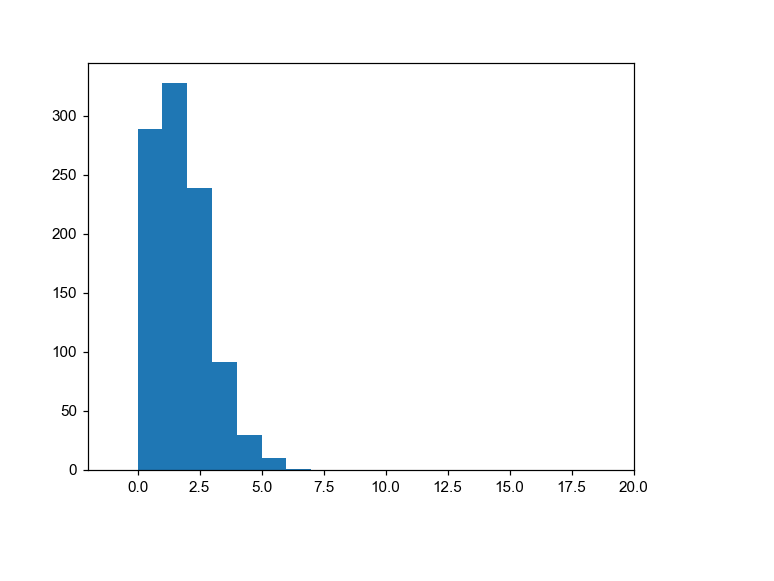

1255.0


In [33]:
sel_species, sel_counts = np.unique(_species, return_counts=True)
usage_vec = np.zeros(len(codebook))
usage_vec[sel_species] = sel_counts

plt.figure()
#plt.scatter(sel_species, sel_counts)
plt.hist(usage_vec, bins=np.arange(-1,20))
plt.show()

print(usage_vec.sum())

In [34]:
np.unique(codebook_df['chr_order'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76], dtype=int64)

In [35]:
#id_2_chr = {_id:_chr for _id, _chr in zip(codebook_df['id'],codebook_df['chr'])}
#id_2_chr = {_i:_chr for _i, _chr in enumerate(codebook_df['chr'])}
id_2_chr = {}
for _i, _chr in enumerate(codebook_df['chr']):
    if _chr == 'X':
        id_2_chr[_i] = 20
    elif _chr == 'Y':
        id_2_chr[_i] = 21
    else:
        id_2_chr[_i] = int(_chr)
        
id_2_chrid = {_i:_chrid for _i, _chrid in enumerate(codebook_df['chr_order'])}

In [36]:
_chrs = np.array([id_2_chr[_id] for _id in _ids])
_chrids = np.array([id_2_chrid[_id] for _id in _ids])

In [39]:
_coords[_chrs==1].shape

(106, 3)

In [40]:
from sklearn.cluster import KMeans
_model = KMeans(n_clusters=2, random_state=0)
_model.fit(_coords[_chrs==sel_chr])


KMeans(n_clusters=2, random_state=0)

<IPython.core.display.Javascript object>


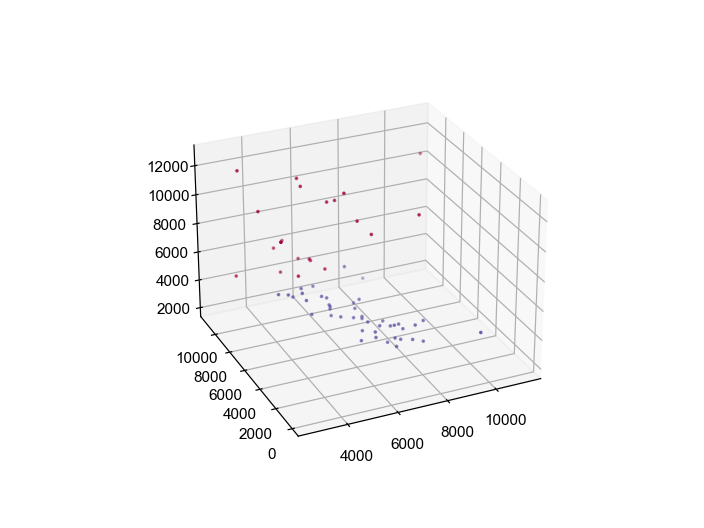

In [67]:
sel_chr = 13

_model = KMeans(n_clusters=2, random_state=0)
_model.fit(_coords[_chrs==sel_chr])

from matplotlib.cm import Reds, Blues, Spectral
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(_coords[_chrs==sel_chr,1], _coords[_chrs==sel_chr,2], _coords[_chrs==sel_chr,0],
           cmap=Spectral, 
           c=_model.labels_,
           #c=_chrids[_chrs==sel_chr],
           s=2)
plt.show()

<IPython.core.display.Javascript object>


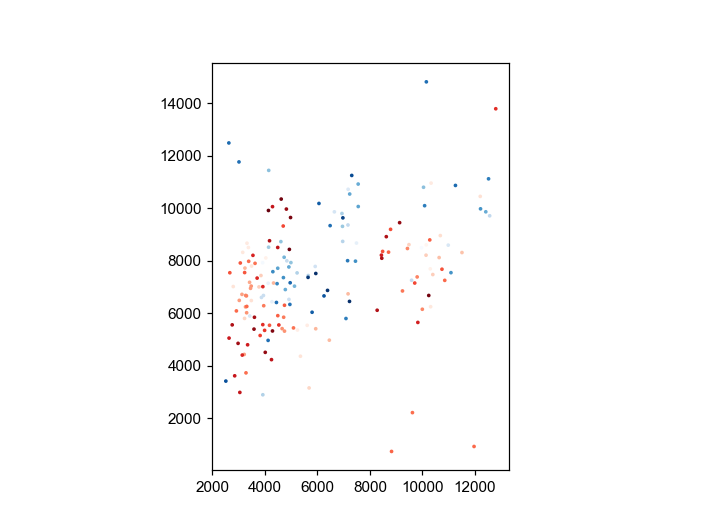

In [290]:
from matplotlib.cm import Reds, Blues, Spectral
fig, ax = plt.subplots()
#ax.imshow(aire_mask.max(0), cmap='Blues', vmin=0, vmax=5)
#ax.imshow(aire_im.max(0), cmap='gray_r', vmin=1000, vmax=40000)
sel_chr = 1
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,2], 
           cmap=Reds, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

sel_chr = 5
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,2], 
           cmap=Blues, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

ax.set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


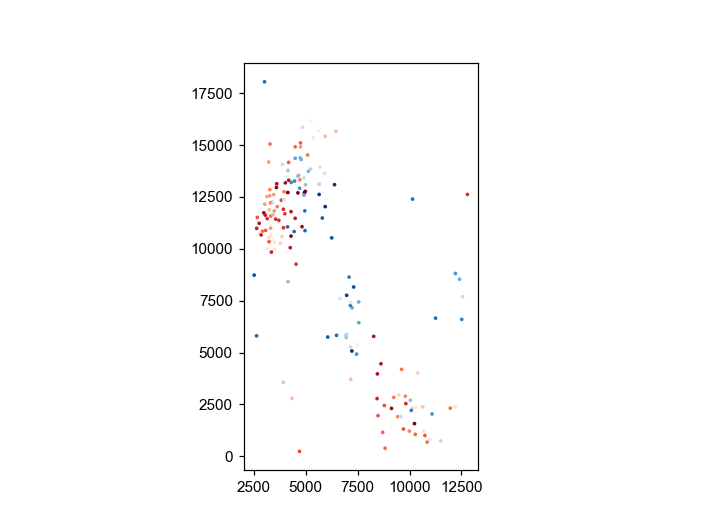

In [292]:
from matplotlib.cm import Reds, Blues, Spectral
fig, ax = plt.subplots()
#ax.imshow(aire_mask.max(0), cmap='Blues', vmin=0, vmax=5)
#ax.imshow(aire_im.max(0), cmap='gray_r', vmin=1000, vmax=40000)
sel_chr = 1
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,1], 
           cmap=Reds, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

sel_chr = 5
ax.scatter(_coords[_chrs==sel_chr,0], _coords[_chrs==sel_chr,1], 
           cmap=Blues, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

ax.set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


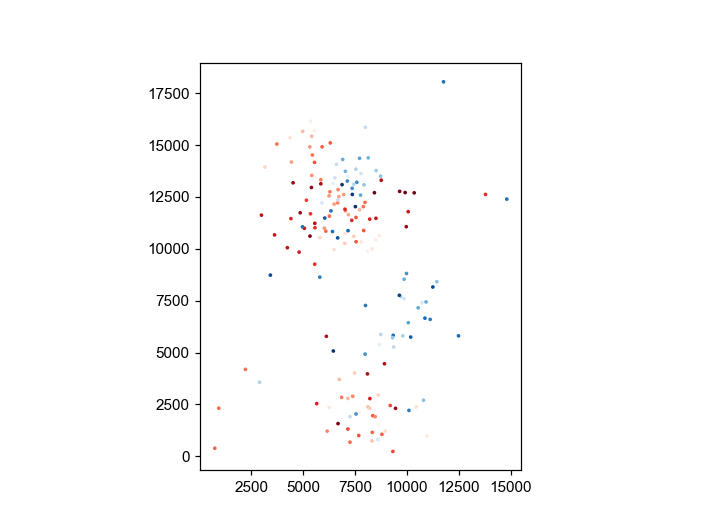

In [293]:
from matplotlib.cm import Reds, Blues, Spectral
fig, ax = plt.subplots()
#ax.imshow(aire_mask.max(0), cmap='Blues', vmin=0, vmax=5)
#ax.imshow(aire_im.max(0), cmap='gray_r', vmin=1000, vmax=40000)
sel_chr = 1
ax.scatter(_coords[_chrs==sel_chr,2], _coords[_chrs==sel_chr,1], 
           cmap=Reds, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

sel_chr = 5
ax.scatter(_coords[_chrs==sel_chr,2], _coords[_chrs==sel_chr,1], 
           cmap=Blues, 
           #c=_ids, 
           c=_chrids[_chrs==sel_chr],
           s=2)

ax.set_aspect('equal')
plt.show()

In [208]:
_g.tuple_id

200

In [252]:
id_2_chrid

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 0,
 78: 1,
 79: 2,
 80: 3,
 81: 4,
 82: 5,
 83: 6,
 84: 7,
 85: 8,
 86: 9,
 87: 10,
 88: 11,
 89: 12,
 90: 13,
 91: 14,
 92: 15,
 93: 16,
 94: 17,
 95: 18,
 96: 19,
 97: 20,
 98: 21,
 99: 22,
 100: 23,
 101: 24,
 102: 25,
 103: 26,
 104: 27,
 105: 28,
 106: 29,
 107: 30,
 108: 31,
 109: 32,
 110: 33,
 111: 34,
 112: 35,


In [207]:
ct

1255

In [205]:
ct

1831

In [197]:
sel_group_inds

[array([1322, 6984, 2117]),
 array([ 7504, 13605]),
 array([ 1517,  5626, 14698]),
 array([1153, 3058, 3978]),
 array([ 4963, 17117, 12847]),
 array([2438, 8645]),
 array([10026, 12094,  1015]),
 array([ 9793, 13913]),
 array([2967, 7691]),
 array([ 6095, 12254,  8544]),
 array([ 427, 5629, 4741]),
 array([12608, 15230,  2086]),
 array([ 6527, 13315,   979]),
 array([ 7249, 11461,  1881]),
 array([ 5974, 13912,  7676]),
 array([ 5396, 13313,  4663]),
 array([10172, 17123, 17316]),
 array([ 4313, 10446]),
 array([3445, 4715, 8383]),
 array([3484, 5708]),
 array([ 1161, 15482, 12037]),
 array([ 75, 254]),
 array([ 8066, 10623]),
 array([4380, 8423, 5360]),
 array([ 5457, 16584,  1589]),
 array([3490, 5843, 3115]),
 array([10559, 12836]),
 array([14747, 15730,  2733]),
 array([10560, 12152]),
 array([ 2327, 12609, 10003]),
 array([ 2669, 13707,  2897]),
 array([3819, 7295,  442]),
 array([ 1501, 15467]),
 array([12304, 17108,  2409]),
 array([ 4313, 13820,  6744]),
 array([13103, 17211,  

In [186]:
len(_inds_list)

6866

In [188]:
np.unique(_inds_list).shape

(5603,)

In [174]:
# search valid
sel_spot_pairs = []
sel_spot_species = []
sel_code_pairs = []

for _spot_pair in tqdm(spot_pairs):
    # get codes for this pair
    _code_pair = tuple(cand_spots.bits[np.array(_spot_pair)])
    if _code_pair in valid_pairs:
        sel_spot_pairs.append(_spot_pair)
        sel_spot_species.append(valid_pair_species[valid_pairs.index(_code_pair)])
        sel_code_pairs.append(_code_pair)
        
sel_species, sel_counts = np.unique(sel_spot_species, return_counts=True)
plt.figure()
#plt.scatter(sel_species, sel_counts)
plt.hist(sel_counts, bins=np.arange(30))
plt.show()

print(len(sel_spot_pairs))

NameError: name 'spot_pairs' is not defined

In [ ]:
def scoring spots

In [ ]:
def scoring_spot_tuples()

In [ ]:
spot_usage = np.zeros(len(cand_spots), dtype=np.int32)
max_spot_usage = 2



In [171]:
_merged_tuple.bits


array([ 7, 38, 11])

39

In [147]:
_matched_nb_id

7120

In [148]:
_nb_spot_ids

array([7120, 7160])

In [153]:
list(_p)+[_matched_nb_id]

[4659, 11690, 7120]

In [145]:
np.argmin(_matched_nb_dists)

0

In [140]:
_merged_tuple.dist_internal()

array([117.07449903,  66.15334376,  72.89642846])

[878,
 395,
 68,
 668,
 212,
 409,
 45,
 494,
 926,
 748,
 348,
 787,
 605,
 198,
 688,
 665,
 718,
 84,
 614,
 445,
 119,
 128,
 156,
 601,
 296,
 582,
 152,
 520,
 177,
 172,
 267,
 671,
 964,
 723,
 44,
 481,
 346,
 7,
 823,
 43,
 358,
 312,
 26,
 949,
 242,
 59,
 977,
 629,
 673,
 366,
 347,
 219,
 38,
 658,
 655,
 98,
 45,
 833,
 459,
 608,
 785,
 596,
 458,
 648,
 686,
 540,
 817,
 225,
 358,
 921,
 869,
 342,
 105,
 729,
 440,
 874,
 390,
 536,
 505,
 511,
 954,
 402,
 962,
 319,
 709,
 367,
 375,
 694,
 689,
 62,
 608,
 758,
 366,
 94,
 728,
 278,
 514,
 26,
 0,
 199,
 412,
 360,
 625,
 796,
 12,
 341,
 756,
 219,
 605,
 562,
 135,
 373,
 341,
 867,
 772,
 899,
 470,
 304,
 665,
 352,
 19,
 952,
 735,
 546,
 928,
 152,
 255,
 210,
 674,
 878,
 441,
 117,
 544,
 259,
 496,
 366,
 971,
 489,
 721,
 805,
 552,
 672,
 674,
 297,
 869,
 450,
 928,
 748,
 257,
 237,
 665,
 325,
 24,
 281,
 742,
 712,
 783,
 626,
 116,
 626,
 243,
 499,
 304,
 184,
 662,
 582,
 965,
 557,
 897,
 865,


<IPython.core.display.Javascript object>


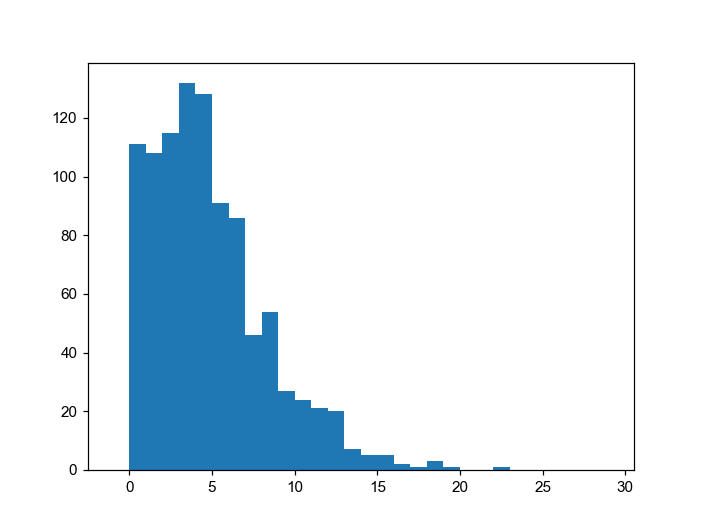

4305.0


In [92]:
sel_species, sel_counts = np.unique(_sel_species, return_counts=True)
usage_vec = np.zeros(len(codebook))
usage_vec[sel_species] = sel_counts

plt.figure()
#plt.scatter(sel_species, sel_counts)
plt.hist(usage_vec, bins=np.arange(-1,30))
plt.show()

print(usage_vec.sum())

In [52]:
_matched_nb_spots

Spots3D([[ 6.8034492e+03,  1.7000000e+01,  1.2100000e+02,  4.5000000e+01,
           3.9858802e-04,  1.5000001e+00,  1.5000001e+00,  1.5000002e+00,
          -1.3803945e-09,  3.8391061e-08,  3.9779236e+02]], dtype=float32)

In [49]:
_nb_spots.bits, _matched_bits

(array([21]), array([21], dtype=int64))

In [47]:
_nb_spots.bits == _matched_bits

array([ True])

In [45]:
np.intersect1d(_nb_spots.bits, _matched_bits)


array([21], dtype=int64)

In [633]:
tree

In [629]:
_nb_spot_ids

array([7178])

In [618]:
_nb_spots.bits

array([39])

1

878

In [563]:
len(cand_spots)

17530

In [564]:
spot_pairs

{(1322, 6984),
 (7938, 9245),
 (7504, 13605),
 (1863, 15149),
 (1517, 5626),
 (1153, 3058),
 (4963, 17117),
 (3988, 4165),
 (2438, 8645),
 (10026, 12094),
 (9793, 13913),
 (4009, 11220),
 (2967, 7691),
 (6095, 12254),
 (427, 5629),
 (814, 6395),
 (12608, 15230),
 (6527, 13315),
 (7249, 11461),
 (5974, 13912),
 (5396, 13313),
 (10172, 17123),
 (4313, 10446),
 (3445, 4715),
 (10610, 11496),
 (3484, 5708),
 (1161, 15482),
 (1576, 10734),
 (2325, 9760),
 (75, 254),
 (8066, 10623),
 (11042, 11724),
 (4380, 8423),
 (3131, 7177),
 (5457, 16584),
 (3490, 5843),
 (10559, 12836),
 (8073, 11637),
 (14747, 15730),
 (10560, 12152),
 (798, 8741),
 (2327, 12609),
 (1853, 2200),
 (2669, 13707),
 (3819, 7295),
 (1501, 15467),
 (12304, 17108),
 (10263, 13484),
 (4313, 13820),
 (13103, 17211),
 (14078, 15226),
 (6420, 14169),
 (7276, 15598),
 (10761, 12130),
 (2081, 8539),
 (11847, 13421),
 (2644, 4267),
 (12981, 13343),
 (5868, 14077),
 (9755, 13855),
 (9547, 14322),
 (9568, 13539),
 (1790, 10067),
 (13

<IPython.core.display.Javascript object>


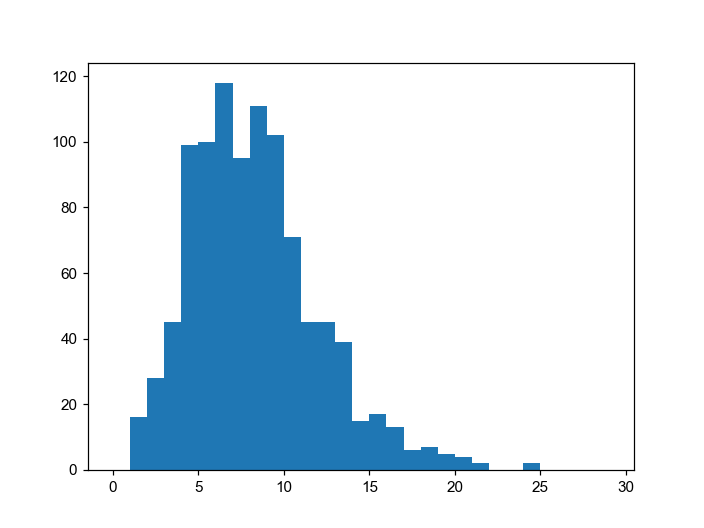

In [311]:
_code_pair

(7, 38)

In [327]:
valid_pairs.index((36,62))

0

In [283]:
tree.query_ball_point(cand_coords[1], 250)

[1, 15236]

In [281]:
cand_bits[tree.query_ball_point(cand_coords[1], 250)]

array([ 0, 86])

In [244]:
all_bits[np.argsort(_dists)[:10]]

array([26, 96, 60, 90, 36, 32, 19, 31, 31, 44])

In [247]:
len(all_coords)

17530

In [248]:
_dists[np.argsort(_dists)[:10]]

array([   0.        ,   62.98074468,  144.2086529 ,  184.84228333,
        304.50494817,  317.900323  ,  487.78496439,  990.96224053,
       1076.49462415, 1086.05833841])

In [246]:
#"seeding_mat = np.zeros(list(Y.shape[:-1])+[n_regs])

neighbor_radius = 250
from scipy.spatial.distance import pdist

all_coords = all_spots[:,1:4] * fov.shared_parameters['distance_zxy']

sel_seeds, sel_bits = [], []

for _bit in range(n_bits):
    # check valid overlapping bits
    _valid_species = np.where(codebook[:,_bit])[0]
    _valid_overlaps = [_b for _b in np.where(codebook[_valid_species].sum(0) > 0)[0] if _b != _bit]
    # loop through neighbors to find matched spots
    for _ic in np.where(all_bits==_bit)[0]:
        _coord = all_coords[_ic]
        _dists = np.linalg.norm(all_coords - _coord, axis=1)
        _neighbors = np.where(_dists < neighbor_radius)[0]
        _nb_bits = all_bits[_neighbors]
        for _b, _nb in zip(_nb_bits, _neighbors):
            if _b in _valid_overlaps:    
                # get seed region id
                _nb_seed = all_coords[_nb]
                # get region id for this seed
                _seed_reg_ids = np.intersect1d(np.where(codebook[:,_b])[0], 
                                               np.where(codebook[:,_bit])[0])
                # append the seed
                _sel_seed = (all_spots[_ic,1:4] + all_spots[_nb,1:4]) / 2
                #seeding_mat[tuple(list(np.round((_seed+_nb_seed)/2).astype(np.int32)))][_seed_reg_ids] = 1        
                if len(sel_seeds)==0 or np.linalg.norm(np.array(sel_seeds) - _sel_seed, axis=1).min() > 0 :
                    sel_seeds.append(_sel_seed)
                    sel_bits.append(_seed_reg_ids[0])
                    
    print(_bit, len(sel_seeds), len(sel_bits))



0 358 358
1 680 680
2 1043 1043
3 1407 1407
4 1772 1772
5 2044 2044
6 2362 2362
7 2743 2743
8 3117 3117
9 3490 3490
10 3809 3809
11 4148 4148
12 4468 4468
13 4750 4750
14 5063 5063
15 5441 5441
16 5772 5772
17 6070 6070
18 6375 6375
19 6686 6686
20 6953 6953
21 7258 7258
22 7491 7491
23 7827 7827
24 8101 8101
25 8426 8426
26 8655 8655
27 8955 8955
28 9217 9217
29 9489 9489
30 9710 9710
31 9942 9942
32 10155 10155
33 10395 10395
34 10642 10642
35 10872 10872
36 11092 11092
37 11301 11301
38 11509 11509
39 11767 11767
40 12000 12000
41 12237 12237
42 12434 12434
43 12675 12675
44 12867 12867
45 13066 13066
46 13248 13248
47 13418 13418
48 13573 13573
49 13754 13754
50 13953 13953
51 14136 14136
52 14324 14324
53 14479 14479
54 14642 14642
55 14804 14804
56 14970 14970
57 15150 15150
58 15288 15288
59 15442 15442
60 15570 15570
61 15707 15707
62 15793 15793
63 15904 15904
64 16086 16086
65 16171 16171
66 16280 16280
67 16435 16435
68 16572 16572
69 16685 16685
70 16815 16815
71 16911 1691

In [236]:
_nb

17392

In [235]:
_nb_seed, _seed_reg_ids

(array([  5628.34072113, 114354.10986328, 142015.20117188]),
 array([90], dtype=int64))

In [227]:
_neighbors

array([  173,  3125, 10897, 14918], dtype=int64)

In [204]:
sel_coords

array([[  5104.70962524, 113833.76660156, 142967.88720703],
       [  5672.13153839, 110727.92285156, 150597.91845703],
       [  8686.42711639, 105616.34033203, 144506.82128906],
       ...,
       [  5599.9956131 , 104934.61669922, 146235.66503906],
       [  9668.20430756, 104139.73828125, 150757.62451172],
       [ 10583.64200592, 106502.58764648, 142934.25585938]])

In [148]:
reload(classes.preprocess)
classes.preprocess.Spots([1,2,3])[1:]

In __new__ with class <class 'ImageAnalysis3.classes.preprocess.Spots'>
In array_finalize:
   self type is <class 'ImageAnalysis3.classes.preprocess.Spots'>
   obj type is <class 'NoneType'>
In __init__ with class <class 'ImageAnalysis3.classes.preprocess.Spots'>
In array_finalize:
   self type is <class 'ImageAnalysis3.classes.preprocess.Spots'>
   obj type is <class 'ImageAnalysis3.classes.preprocess.Spots'>


Spots([], shape=(0, 2, 3), dtype=float64)

<function numpy.prod(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

In [141]:
test_crop

[array([ True]), array([False]), array([False])]

In [128]:
test_crop.to_slices()

(slice(0, 10, None), slice(10, 20, None), slice(20, 30, None))

In [129]:
reload(classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\__init__.py'>

In [142]:
?np.ndarray

In [143]:
np.float

float

In [ ]:
def select_spots_in_crop(spots:np.ndarray,
                         crop:ImageCrop_3d,
                         ):
    """Select spots in given 3d crop"""
    

In [28]:
len(all_bits)/3

329486.0

In [149]:
np.asarray([1,2,3])

array([1, 2, 3])

In [ ]:
# given

# GPU

In [8]:
import math

import torch
import torch.multiprocessing as multiprocessing
import torch.nn.functional as F

print(torch.cuda.device_count())

1


In [9]:
data_dtype = torch.float32
pos_dtype = torch.int16
device = 'cuda:0'


class Gaussian_Kernel_3D(torch.nn.Module):
    def __init__(self, shape, device, image_dtype=data_dtype):
        super(Gaussian_Kernel_3D, self).__init__()

        self.shape = shape
        self.device = device
        self.image_dtype = image_dtype
        

    def _normalized_basis(self, mu, sigma, num_dim):
        _size = self.shape[num_dim]
        _mu = mu[:, num_dim, None]
        _sigma = sigma[:, num_dim, None]

        return (
            1 / (2 * math.pi * _sigma ** 2) ** (1 / 2) *
            torch.exp(- 1 / 2 * ((_mu - torch.arange(_size, dtype=self.image_dtype, device=self.device)) / _sigma) ** 2)
        )

    def forward(self, x, mu, sigma):
        x = torch.einsum('nz,nt->nzt', [self._normalized_basis(mu, sigma,  num_dim=2), x])
        x = torch.einsum('ny,nzt->nyzt', [self._normalized_basis(mu, sigma, num_dim=1), x])
        x = torch.einsum('nx,nyzt->xyzt', [self._normalized_basis(mu, sigma, num_dim=0), x])

        return x

    
    
def normalize(x, mask=None, std=12.0, num_iters=64):
    size = x.shape[-1]

    _x = x.view(-1, size)
    w = torch.ones_like(_x)
    for num_iter in range(num_iters):
        _mean = torch.sum(w * _x, dim=0) / torch.sum(w, dim=0)
        w = torch.exp(-1 / 2 * ((_x - _mean) / std) ** 2)

    x = torch.clamp(x - _mean, min=0)
    if mask is None:
        x = x / torch.mean(x.view(-1, size) ** 2, dim=0).sqrt()
    else:
        x = x / torch.mean(x[mask] ** 2, dim=0).sqrt()

    return x

kernel = Gaussian_Kernel_3D([40,40,40], device=device)

In [10]:
kernel

Gaussian_Kernel_3D()

(988, 99)


In [13]:
sel_combo_ims = np.array([_im[sel_crop.to_slices()] for _im in combo_ims])

# copy image and encoding matrix into GPU
H = torch.tensor(codebook, dtype=data_dtype).to(device='cuda:0')
#H = torch.cat([H, torch.ones(1, H.shape[1], dtype=data_dtype).to(device=device)], dim=0) # background
Y = torch.tensor(sel_combo_ims.transpose(1,2,3,0).astype(np.float32), 
                 dtype=data_dtype).to(device='cuda:0')
#C = torch.tensor(C, dtype=dtype).to(device=torch.cuda.device)

Y = normalize(Y,)

In [14]:
n_regs, n_bits = H.shape
size_z, size_x, size_y, n_bits = Y.shape
print(n_regs, n_bits)
print(size_z, size_x, size_y)

988 99
60 170 140
